In [15]:
import os
import pandas as pd
import numpy as np
from rich.console import Console
from rich.table import Table
import matplotlib.pyplot as plt

console = Console()

INPUTS = [
    'datalen_bytes',
    'pub_count',
    'sub_count', 
    'reliability',
    'multicast',
    'durability_0',
    'durability_1',
    'durability_2',
    'durability_3',
]
METRICS = [
    'latency_us',
    'total_throughput_mbps',
    'avg_throughput_mbps',
    'total_samples_per_sec',
    'avg_samples_per_sec',
    'total_lost_samples',
    'avg_lost_samples',
    'total_lost_samples_percentage',
    'avg_lost_samples_percentage',
    'total_received_samples',
    'avg_received_samples',
    'total_received_samples_percentage',
    'avg_received_samples_percentage',
]

STATS = [
    'min', 'max',
    'mean', 'std',
    '1', '2', '5', '10', 
    '25', '30', '40', '50', '60', '70', '75', '80', 
    '90', '95', '99'
]

FULL_DATASET_PATH = "./../datasets/2023-09-30_20_percent_truncated_dataset.csv"
TRAIN_DATASET_PATH = "./../datasets/2023-09-30_train_dataset.csv"
EXTRAPOLATION_TEST_DATASET_PATH = "./../datasets/2023-09-30_extrapolation_test_dataset.csv"

if not os.path.exists(FULL_DATASET_PATH):
    print(f"Full dataset not found: \n{FULL_DATASET_PATH}")

if not os.path.exists(TRAIN_DATASET_PATH):
    print(f"Train dataset not found: \n{TRAIN_DATASET_PATH}")

if not os.path.exists(EXTRAPOLATION_TEST_DATASET_PATH):
    print(f"Extrapolation test dataset not found: \n{EXTRAPOLATION_TEST_DATASET_PATH}")

full_df = pd.read_csv(FULL_DATASET_PATH)
train_df = pd.read_csv(TRAIN_DATASET_PATH)
extrapolation_test_df = pd.read_csv(EXTRAPOLATION_TEST_DATASET_PATH)

print(f"Full dataset shape: {full_df.shape}")
print(f"Train dataset shape: {train_df.shape}")
print(f"Extrapolation test dataset shape: {extrapolation_test_df.shape}")

full_df_columns_path = "full_df_columns.txt"
with open(full_df_columns_path, "w") as file:
    for column in full_df.columns:
        file.write(column + "\n")

Full dataset shape: (1470, 258)
Train dataset shape: (1227, 258)
Extrapolation test dataset shape: (243, 258)


# Summary Stats per Metric Stat

In [14]:
for METRIC in METRICS:
    metric_stat_col_names = []

    for STAT in STATS:
        metric_stat_col_names.append(f"{METRIC}_{STAT}")

    for metric_stat_col in metric_stat_col_names:
        if metric_stat_col not in full_df.columns:
            print(f"Metric stat column not found in full_df: {metric_stat_col}")

    metric_df = full_df[metric_stat_col_names]

    metric_table = Table(title=f"{METRIC} Stats Summary", show_lines=True)
    metric_table.add_column("Stat")
    metric_table.add_column("Count")
    metric_table.add_column("Mean")
    metric_table.add_column("Std")
    metric_table.add_column("Min")
    metric_table.add_column("25%")
    metric_table.add_column("50%")
    metric_table.add_column("75%")
    metric_table.add_column("Max")

    for col in metric_df.columns:
        metric_table.add_row(
            col,
            f"{metric_df[col].count():.0f}",
            f"{metric_df[col].mean():.2f}",
            f"{metric_df[col].std():.2f}",
            f"{metric_df[col].min():.2f}",
            f"{metric_df[col].quantile(0.25):.2f}",
            f"{metric_df[col].quantile(0.50):.2f}",
            f"{metric_df[col].quantile(0.75):.2f}",
            f"{metric_df[col].max():.2f}",
        )

    console.print(metric_table)

                                             latency_us Stats Summary                                              
┏━━━━━━━━━━━━━━━━━┳━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━┓
┃ Stat            ┃ Count ┃ Mean       ┃ Std         ┃ Min     ┃ 25%      ┃ 50%       ┃ 75%        ┃ Max          ┃
┡━━━━━━━━━━━━━━━━━╇━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━┩
│ latency_us_min  │ 1467  │ 351318.85  │ 2959602.49  │ 322.00  │ 5275.00  │ 16956.00  │ 38686.50   │ 62359251.00  │
├─────────────────┼───────┼────────────┼─────────────┼─────────┼──────────┼───────────┼────────────┼──────────────┤
│ latency_us_max  │ 1467  │ 4391149.00 │ 13047480.13 │ 7008.00 │ 63996.50 │ 135097.00 │ 1719441.00 │ 188936227.00 │
├─────────────────┼───────┼────────────┼─────────────┼─────────┼──────────┼───────────┼────────────┼──────────────┤
│ latency_us_mean │ 1467  │ 1055997.55 │ 4262597.99  │ 494.45  │ 15749.53 │ 44737.24  │ 258616.51  │ 62359251.00  │
├─────────────────┼───────┼────────────┼─────────────┼─────────┼──────────┼───────────┼────────────┼──────────────┤
│ latency_us_std  │ 1467  │ 801728.38  │ 2781281.12  │ 0.00    │ 4787.87  │ 16821.80  │ 357799.60  │ 53005821.91  │
├─────────────────┼───────┼────────────┼─────────────┼─────────┼──────────┼───────────┼────────────┼──────────────┤
│ latency_us_1    │ 1467  │ 362713.05  │ 2971934.59  │ 361.00  │ 9894.89  │ 22738.24  │ 41175.74   │ 62359251.00  │
├─────────────────┼───────┼────────────┼─────────────┼─────────┼──────────┼───────────┼────────────┼──────────────┤
│ latency_us_2    │ 1467  │ 372598.84  │ 2985646.35  │ 366.00  │ 9952.86  │ 23054.80  │ 44093.64   │ 62359251.00  │
├─────────────────┼───────┼────────────┼─────────────┼─────────┼──────────┼───────────┼────────────┼──────────────┤
│ latency_us_5    │ 1467  │ 400878.02  │ 3030778.99  │ 371.00  │ 10059.25 │ 25759.20  │ 46164.18   │ 62359251.00  │
├─────────────────┼───────┼────────────┼─────────────┼─────────┼──────────┼───────────┼────────────┼──────────────┤
│ latency_us_10   │ 1467  │ 447114.19  │ 3110217.73  │ 375.00  │ 10998.35 │ 29961.50  │ 48588.00   │ 62359251.00  │
├─────────────────┼───────┼────────────┼─────────────┼─────────┼──────────┼───────────┼────────────┼──────────────┤
│ latency_us_25   │ 1467  │ 586086.61  │ 3336590.31  │ 389.00  │ 12479.75 │ 34065.00  │ 73158.25   │ 62359251.00  │
├─────────────────┼───────┼────────────┼─────────────┼─────────┼──────────┼───────────┼────────────┼──────────────┤
│ latency_us_30   │ 1467  │ 638994.31  │ 3421416.68  │ 393.00  │ 13385.80 │ 35591.00  │ 80342.70   │ 62359251.00  │
├─────────────────┼───────┼────────────┼─────────────┼─────────┼──────────┼───────────┼────────────┼──────────────┤
│ latency_us_40   │ 1467  │ 772449.27  │ 3664525.44  │ 401.00  │ 14663.00 │ 37861.00  │ 99592.20   │ 62359251.00  │
├─────────────────┼───────┼────────────┼─────────────┼─────────┼──────────┼───────────┼────────────┼──────────────┤
│ latency_us_50   │ 1467  │ 905070.29  │ 3921540.85  │ 436.00  │ 15218.50 │ 38786.00  │ 123848.50  │ 62359251.00  │
├─────────────────┼───────┼────────────┼─────────────┼─────────┼──────────┼───────────┼────────────┼──────────────┤
│ latency_us_60   │ 1467  │ 1064019.13 │ 4331103.83  │ 463.00  │ 15356.00 │ 39417.00  │ 133579.80  │ 62359251.00  │
├─────────────────┼───────┼────────────┼─────────────┼─────────┼──────────┼───────────┼────────────┼──────────────┤
│ latency_us_70   │ 1467  │ 1219155.92 │ 4788014.35  │ 486.00  │ 15600.00 │ 40454.40  │ 163612.35  │ 67573330.80  │
├─────────────────┼───────┼────────────┼─────────────┼─────────┼──────────┼───────────┼────────────┼──────────────┤
│ latency_us_75   │ 1467  │ 1307085.60 │ 5116101.35  │ 492.00  │ 16279.25 │ 42878.50  │ 182839.62  │ 79417135.00  │
├─────────────────┼───────┼────────────┼─────────────┼─────────┼──────────┼───────────┼────────────┼──────────────┤
│ latency_us_80   │ 1467  │ 1421714.89 │ 5615349.85  │ 4

                                total_throughput_mbps Stats Summary                                
┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━━┳━━━━━━━━━┓
┃ Stat                       ┃ Count ┃ Mean   ┃ Std    ┃ Min   ┃ 25%   ┃ 50%   ┃ 75%    ┃ Max     ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━━╇━━━━━━━━━┩
│ total_throughput_mbps_min  │ 1470  │ 102.34 │ 298.99 │ 0.00  │ 0.00  │ 0.00  │ 84.67  │ 2303.60 │
├────────────────────────────┼───────┼────────┼────────┼───────┼───────┼───────┼────────┼─────────┤
│ total_throughput_mbps_max  │ 1470  │ 350.17 │ 528.65 │ 11.00 │ 67.73 │ 96.80 │ 479.70 │ 2402.30 │
├────────────────────────────┼───────┼────────┼────────┼───────┼───────┼───────┼────────┼─────────┤
│ total_throughput_mbps_mean │ 1470  │ 218.49 │ 405.78 │ 0.05  │ 7.81  │ 94.24 │ 96.28  │ 2373.59 │
├────────────────────────────┼───────┼────────┼────────┼───────┼───────┼───────┼────────┼─────────┤
│ total_throughput_mbps_std  │ 1470  │ 74.20  │ 175.12 │ 0.06  │ 2.46  │ 8.19  │ 42.32  │ 1179.85 │
├────────────────────────────┼───────┼────────┼────────┼───────┼───────┼───────┼────────┼─────────┤
│ total_throughput_mbps_1    │ 1470  │ 129.15 │ 349.16 │ 0.00  │ 0.00  │ 0.00  │ 94.00  │ 2339.19 │
├────────────────────────────┼───────┼────────┼────────┼───────┼───────┼───────┼────────┼─────────┤
│ total_throughput_mbps_2    │ 1470  │ 131.93 │ 352.72 │ 0.00  │ 0.00  │ 0.00  │ 94.50  │ 2341.74 │
├────────────────────────────┼───────┼────────┼────────┼───────┼───────┼───────┼────────┼─────────┤
│ total_throughput_mbps_5    │ 1470  │ 141.21 │ 365.13 │ 0.00  │ 0.00  │ 0.00  │ 94.70  │ 2347.78 │
├────────────────────────────┼───────┼────────┼────────┼───────┼───────┼───────┼────────┼─────────┤
│ total_throughput_mbps_10   │ 1470  │ 148.78 │ 375.44 │ 0.00  │ 0.00  │ 0.00  │ 95.00  │ 2354.35 │
├────────────────────────────┼───────┼────────┼────────┼───────┼───────┼───────┼────────┼─────────┤
│ total_throughput_mbps_25   │ 1470  │ 166.57 │ 391.00 │ 0.00  │ 0.00  │ 0.00  │ 95.50  │ 2367.38 │
├────────────────────────────┼───────┼────────┼────────┼───────┼───────┼───────┼────────┼─────────┤
│ total_throughput_mbps_30   │ 1470  │ 174.12 │ 398.64 │ 0.00  │ 0.00  │ 0.00  │ 95.60  │ 2369.90 │
├────────────────────────────┼───────┼────────┼────────┼───────┼───────┼───────┼────────┼─────────┤
│ total_throughput_mbps_40   │ 1470  │ 183.99 │ 407.23 │ 0.00  │ 0.00  │ 0.00  │ 95.70  │ 2373.10 │
├────────────────────────────┼───────┼────────┼────────┼───────┼───────┼───────┼────────┼─────────┤
│ total_throughput_mbps_50   │ 1470  │ 222.53 │ 451.84 │ 0.00  │ 0.00  │ 79.75 │ 96.20  │ 2377.15 │
├────────────────────────────┼───────┼────────┼────────┼───────┼───────┼───────┼────────┼─────────┤
│ total_throughput_mbps_60   │ 1470  │ 234.97 │ 465.07 │ 0.00  │ 0.00  │ 91.80 │ 96.78  │ 2380.00 │
├────────────────────────────┼───────┼────────┼────────┼───────┼───────┼───────┼────────┼─────────┤
│ total_throughput_mbps_70   │ 1470  │ 244.98 │ 474.85 │ 0.00  │ 0.00  │ 94.70 │ 98.50  │ 2381.90 │
├────────────────────────────┼───────┼────────┼────────┼───────┼───────┼───────┼────────┼─────────┤
│ total_throughput_mbps_75   │ 1470  │ 277.24 │ 502.44 │ 0.00  │ 0.00  │ 95.70 │ 112.51 │ 2382.90 │
├────────────────────────────┼───────┼────────┼────────┼───────┼───────┼───────┼────────┼─────────┤
│ total_throughput_mbps_80   │ 1470  │ 283.38 │ 505.34 │ 0.00  │ 0.00  │ 95.70 │ 129.38 │ 2383.70 │
├────────────────────────────┼───────┼────────┼────────┼───────┼───────┼───────┼────────┼─────────┤
│ total_throughput_mbps_90   │ 1470  │ 302.24 │ 511.35 │ 0.00  │ 16.80 │ 96.00 │ 230.45 │ 2386.20 │
├────────────────────────────┼───────┼────────┼────────┼───────┼───────┼───────┼────────┼─────────┤
│ total_throughput_mbps_95   │ 1470  │ 314.92 │ 514.67 │ 0.00  │ 25.60 │ 96.20 │ 321.85 │ 2388.70 │
├────────────────────────────┼───────┼────────┼────────┼───────┼───────┼───────┼────────┼─────────┤


                             avg_throughput_mbps Stats Summary                             
┏━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━┳━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━━┓
┃ Stat                     ┃ Count ┃ Mean  ┃ Std   ┃ Min  ┃ 25%  ┃ 50%   ┃ 75%   ┃ Max    ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━╇━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━━┩
│ avg_throughput_mbps_min  │ 1470  │ 33.02 │ 38.54 │ 0.00 │ 2.37 │ 10.77 │ 81.98 │ 95.88  │
├──────────────────────────┼───────┼───────┼───────┼──────┼──────┼───────┼───────┼────────┤
│ avg_throughput_mbps_max  │ 1470  │ 43.29 │ 39.50 │ 0.69 │ 8.07 │ 21.33 │ 95.68 │ 141.80 │
├──────────────────────────┼───────┼───────┼───────┼──────┼──────┼───────┼───────┼────────┤
│ avg_throughput_mbps_mean │ 1470  │ 39.20 │ 39.04 │ 0.07 │ 4.78 │ 19.16 │ 91.47 │ 96.10  │
├──────────────────────────┼───────┼───────┼───────┼──────┼──────┼───────┼───────┼────────┤
│ avg_throughput_mbps_std  │ 1470  │ 1.97  │ 5.36  │ 0.00 │ 0.09 │ 0.27  │ 1.26  │ 47.56  │
├──────────────────────────┼───────┼───────┼───────┼──────┼──────┼───────┼───────┼────────┤
│ avg_throughput_mbps_1    │ 1470  │ 35.18 │ 39.18 │ 0.00 │ 3.19 │ 13.92 │ 87.45 │ 95.97  │
├──────────────────────────┼───────┼───────┼───────┼──────┼──────┼───────┼───────┼────────┤
│ avg_throughput_mbps_2    │ 1470  │ 35.57 │ 39.25 │ 0.00 │ 3.30 │ 15.62 │ 88.30 │ 96.01  │
├──────────────────────────┼───────┼───────┼───────┼──────┼──────┼───────┼───────┼────────┤
│ avg_throughput_mbps_5    │ 1470  │ 36.45 │ 39.36 │ 0.00 │ 3.56 │ 17.72 │ 88.80 │ 96.03  │
├──────────────────────────┼───────┼───────┼───────┼──────┼──────┼───────┼───────┼────────┤
│ avg_throughput_mbps_10   │ 1470  │ 36.96 │ 39.41 │ 0.00 │ 3.69 │ 18.04 │ 90.47 │ 96.04  │
├──────────────────────────┼───────┼───────┼───────┼──────┼──────┼───────┼───────┼────────┤
│ avg_throughput_mbps_25   │ 1470  │ 38.14 │ 39.55 │ 0.00 │ 3.82 │ 18.84 │ 93.26 │ 96.07  │
├──────────────────────────┼───────┼───────┼───────┼──────┼──────┼───────┼───────┼────────┤
│ avg_throughput_mbps_30   │ 1470  │ 38.47 │ 39.60 │ 0.00 │ 3.86 │ 19.02 │ 93.99 │ 96.08  │
├──────────────────────────┼───────┼───────┼───────┼──────┼──────┼───────┼───────┼────────┤
│ avg_throughput_mbps_40   │ 1470  │ 39.01 │ 39.45 │ 0.00 │ 4.42 │ 19.14 │ 94.27 │ 96.30  │
├──────────────────────────┼───────┼───────┼───────┼──────┼──────┼───────┼───────┼────────┤
│ avg_throughput_mbps_50   │ 1470  │ 39.39 │ 39.44 │ 0.00 │ 4.56 │ 19.19 │ 94.41 │ 96.40  │
├──────────────────────────┼───────┼───────┼───────┼──────┼──────┼───────┼───────┼────────┤
│ avg_throughput_mbps_60   │ 1470  │ 39.78 │ 39.45 │ 0.00 │ 4.81 │ 19.21 │ 94.65 │ 96.50  │
├──────────────────────────┼───────┼───────┼───────┼──────┼──────┼───────┼───────┼────────┤
│ avg_throughput_mbps_70   │ 1470  │ 40.19 │ 39.46 │ 0.00 │ 5.10 │ 19.26 │ 94.81 │ 96.50  │
├──────────────────────────┼───────┼───────┼───────┼──────┼──────┼───────┼───────┼────────┤
│ avg_throughput_mbps_75   │ 1470  │ 40.38 │ 39.46 │ 0.00 │ 5.20 │ 19.26 │ 94.88 │ 97.20  │
├──────────────────────────┼───────┼───────┼───────┼──────┼──────┼───────┼───────┼────────┤
│ avg_throughput_mbps_80   │ 1470  │ 40.58 │ 39.43 │ 0.00 │ 5.32 │ 19.36 │ 94.95 │ 97.20  │
├──────────────────────────┼───────┼───────┼───────┼──────┼──────┼───────┼───────┼────────┤
│ avg_throughput_mbps_90   │ 1470  │ 41.15 │ 39.31 │ 0.23 │ 5.84 │ 19.41 │ 95.11 │ 97.20  │
├──────────────────────────┼───────┼───────┼───────┼──────┼──────┼───────┼───────┼────────┤
│ avg_throughput_mbps_95   │ 1470  │ 41.52 │ 39.23 │ 0.37 │ 6.29 │ 19.58 │ 95.26 │ 98.10  │
├──────────────────────────┼───────┼───────┼───────┼──────┼──────┼───────┼───────┼────────┤
│ avg_throughput_mbps_99   │ 1470  │ 42.27 │ 39.24 │ 0.66 │ 7.29 │ 20.10 │ 95.48 │ 101.49 │
└──────────────────────────┴───────┴───────┴───────┴──────┴──────┴───────┴───────┴────────┘

                                     total_samples_per_sec Stats Summary                                      
┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━┳━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━━┓
┃ Stat                       ┃ Count ┃ Mean     ┃ Std      ┃ Min   ┃ 25%    ┃ 50%     ┃ 75%      ┃ Max       ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━╇━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━━┩
│ total_samples_per_sec_min  │ 1470  │ 321.60   │ 1123.41  │ 0.00  │ 0.00   │ 0.00    │ 174.00   │ 15052.00  │
├────────────────────────────┼───────┼──────────┼──────────┼───────┼────────┼─────────┼──────────┼───────────┤
│ total_samples_per_sec_max  │ 1470  │ 14902.55 │ 22143.38 │ 95.00 │ 375.00 │ 4258.50 │ 23493.25 │ 107168.00 │
├────────────────────────────┼───────┼──────────┼──────────┼───────┼────────┼─────────┼──────────┼───────────┤
│ total_samples_per_sec_mean │ 1470  │ 2425.46  │ 4073.56  │ 7.78  │ 324.91 │ 930.98  │ 2459.67  │ 29114.38  │
├────────────────────────────┼───────┼──────────┼──────────┼───────┼────────┼─────────┼──────────┼───────────┤
│ total_samples_per_sec_std  │ 1470  │ 3276.95  │ 5137.67  │ 0.26  │ 9.99   │ 924.09  │ 4665.29  │ 31154.18  │
├────────────────────────────┼───────┼──────────┼──────────┼───────┼────────┼─────────┼──────────┼───────────┤
│ total_samples_per_sec_1    │ 1470  │ 462.37   │ 1587.69  │ 0.00  │ 0.00   │ 0.00    │ 186.00   │ 16532.74  │
├────────────────────────────┼───────┼──────────┼──────────┼───────┼────────┼─────────┼──────────┼───────────┤
│ total_samples_per_sec_2    │ 1470  │ 477.81   │ 1630.30  │ 0.00  │ 0.00   │ 0.00    │ 202.00   │ 16915.16  │
├────────────────────────────┼───────┼──────────┼──────────┼───────┼────────┼─────────┼──────────┼───────────┤
│ total_samples_per_sec_5    │ 1470  │ 584.97   │ 1888.35  │ 0.00  │ 0.00   │ 0.00    │ 299.50   │ 17632.00  │
├────────────────────────────┼───────┼──────────┼──────────┼───────┼────────┼─────────┼──────────┼───────────┤
│ total_samples_per_sec_10   │ 1470  │ 649.46   │ 2068.93  │ 0.00  │ 0.00   │ 0.00    │ 347.00   │ 19626.50  │
├────────────────────────────┼───────┼──────────┼──────────┼───────┼────────┼─────────┼──────────┼───────────┤
│ total_samples_per_sec_25   │ 1470  │ 938.62   │ 2988.76  │ 0.00  │ 0.00   │ 0.00    │ 363.75   │ 26242.75  │
├────────────────────────────┼───────┼──────────┼──────────┼───────┼────────┼─────────┼──────────┼───────────┤
│ total_samples_per_sec_30   │ 1470  │ 1021.06  │ 3153.80  │ 0.00  │ 0.00   │ 0.00    │ 367.00   │ 27101.00  │
├────────────────────────────┼───────┼──────────┼──────────┼───────┼────────┼─────────┼──────────┼───────────┤
│ total_samples_per_sec_40   │ 1470  │ 1321.69  │ 3815.25  │ 0.00  │ 0.00   │ 0.00    │ 373.00   │ 29307.00  │
├────────────────────────────┼───────┼──────────┼──────────┼───────┼────────┼─────────┼──────────┼───────────┤
│ total_samples_per_sec_50   │ 1470  │ 1668.30  │ 4643.04  │ 0.00  │ 0.00   │ 159.25  │ 795.25   │ 38886.00  │
├────────────────────────────┼───────┼──────────┼──────────┼───────┼────────┼─────────┼──────────┼───────────┤
│ total_samples_per_sec_60   │ 1470  │ 1945.45  │ 5129.46  │ 0.00  │ 0.00   │ 178.00  │ 932.00   │ 43040.00  │
├────────────────────────────┼───────┼──────────┼──────────┼───────┼────────┼─────────┼──────────┼───────────┤
│ total_samples_per_sec_70   │ 1470  │ 2175.72  │ 5531.23  │ 0.00  │ 0.00   │ 184.00  │ 1227.15  │ 45482.80  │
├────────────────────────────┼───────┼──────────┼──────────┼───────┼────────┼─────────┼──────────┼───────────┤
│ total_samples_per_sec_75   │ 1470  │ 2617.15  │ 6369.65  │ 0.00  │ 0.00   │ 226.00  │ 1862.00  │ 46968.00  │
├────────────────────────────┼───────┼──────────┼──────────┼───────┼────────┼─────────┼──────────┼───────────┤
│ total_samples_per_sec_80   │ 1470  │ 3287.57  │ 7231.62  │ 0.00  │ 0.00   │ 352.00  │ 2039.00  │ 48458.40  │
├────────────────────────────┼───────┼──────────┼──────────┼───────┼────────┼─────────┼──────────┼───────────┤
│ to

                                  avg_samples_per_sec Stats Summary                                   
┏━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━┓
┃ Stat                     ┃ Count ┃ Mean    ┃ Std     ┃ Min  ┃ 25%    ┃ 50%    ┃ 75%     ┃ Max      ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━┩
│ avg_samples_per_sec_min  │ 1470  │ 2713.06 │ 5754.87 │ 0.00 │ 21.15  │ 186.00 │ 1973.40 │ 31696.00 │
├──────────────────────────┼───────┼─────────┼─────────┼──────┼────────┼────────┼─────────┼──────────┤
│ avg_samples_per_sec_max  │ 1470  │ 4021.30 │ 7559.85 │ 4.32 │ 112.00 │ 374.30 │ 3852.13 │ 32360.00 │
├──────────────────────────┼───────┼─────────┼─────────┼──────┼────────┼────────┼─────────┼──────────┤
│ avg_samples_per_sec_mean │ 1470  │ 3658.94 │ 7264.81 │ 2.13 │ 74.60  │ 371.50 │ 3489.12 │ 32181.96 │
├──────────────────────────┼───────┼─────────┼─────────┼──────┼────────┼────────┼─────────┼──────────┤
│ avg_samples_per_sec_std  │ 1470  │ 214.70  │ 524.96  │ 0.01 │ 0.36   │ 5.57   │ 197.68  │ 4717.79  │
├──────────────────────────┼───────┼─────────┼─────────┼──────┼────────┼────────┼─────────┼──────────┤
│ avg_samples_per_sec_1    │ 1470  │ 3139.92 │ 6604.90 │ 0.00 │ 32.57  │ 191.26 │ 2219.00 │ 31901.78 │
├──────────────────────────┼───────┼─────────┼─────────┼──────┼────────┼────────┼─────────┼──────────┤
│ avg_samples_per_sec_2    │ 1470  │ 3237.11 │ 6805.23 │ 0.00 │ 35.49  │ 206.15 │ 2355.02 │ 31977.64 │
├──────────────────────────┼───────┼─────────┼─────────┼──────┼────────┼────────┼─────────┼──────────┤
│ avg_samples_per_sec_5    │ 1470  │ 3364.85 │ 6993.72 │ 0.00 │ 36.00  │ 266.02 │ 2639.89 │ 32109.50 │
├──────────────────────────┼───────┼─────────┼─────────┼──────┼────────┼────────┼─────────┼──────────┤
│ avg_samples_per_sec_10   │ 1470  │ 3446.51 │ 7121.86 │ 0.00 │ 36.20  │ 300.94 │ 2691.82 │ 32136.00 │
├──────────────────────────┼───────┼─────────┼─────────┼──────┼────────┼────────┼─────────┼──────────┤
│ avg_samples_per_sec_25   │ 1470  │ 3549.83 │ 7241.92 │ 0.00 │ 40.15  │ 344.92 │ 3168.22 │ 32165.00 │
├──────────────────────────┼───────┼─────────┼─────────┼──────┼────────┼────────┼─────────┼──────────┤
│ avg_samples_per_sec_30   │ 1470  │ 3573.87 │ 7256.28 │ 0.00 │ 45.08  │ 347.44 │ 3198.81 │ 32172.00 │
├──────────────────────────┼───────┼─────────┼─────────┼──────┼────────┼────────┼─────────┼──────────┤
│ avg_samples_per_sec_40   │ 1470  │ 3636.60 │ 7272.40 │ 0.00 │ 57.70  │ 371.15 │ 3436.45 │ 32181.00 │
├──────────────────────────┼───────┼─────────┼─────────┼──────┼────────┼────────┼─────────┼──────────┤
│ avg_samples_per_sec_50   │ 1470  │ 3682.73 │ 7303.10 │ 0.00 │ 61.08  │ 372.80 │ 3486.88 │ 32191.00 │
├──────────────────────────┼───────┼─────────┼─────────┼──────┼────────┼────────┼─────────┼──────────┤
│ avg_samples_per_sec_60   │ 1470  │ 3723.35 │ 7336.50 │ 0.00 │ 72.41  │ 372.90 │ 3579.01 │ 32202.00 │
├──────────────────────────┼───────┼─────────┼─────────┼──────┼────────┼────────┼─────────┼──────────┤
│ avg_samples_per_sec_70   │ 1470  │ 3768.98 │ 7377.10 │ 0.00 │ 73.80  │ 373.00 │ 3656.79 │ 32211.40 │
├──────────────────────────┼───────┼─────────┼─────────┼──────┼────────┼────────┼─────────┼──────────┤
│ avg_samples_per_sec_75   │ 1470  │ 3789.41 │ 7392.25 │ 0.00 │ 74.36  │ 373.00 │ 3670.43 │ 32216.00 │
├──────────────────────────┼───────┼─────────┼─────────┼──────┼────────┼────────┼─────────┼──────────┤
│ avg_samples_per_sec_80   │ 1470  │ 3812.12 │ 7411.42 │ 0.00 │ 83.01  │ 373.10 │ 3678.59 │ 32220.60 │
├──────────────────────────┼───────┼─────────┼─────────┼──────┼────────┼────────┼─────────┼──────────┤
│ avg_samples_per_sec_90   │ 1470  │ 3859.45 │ 7439.40 │ 4.04 │ 93.75  │ 374.00 │ 3715.16 │ 32239.80 │
├──────────────────────────┼───────┼─────────┼─────────┼──────┼────────┼────────┼─────────┼──────────┤
│ avg_samples_per_sec_95   │ 1470  │ 3895.18 │ 7463.21 │ 4.12 │ 97.15  │ 374.00 │ 3744

                                    total_lost_samples Stats Summary                                     
┏━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━┳━━━━━━┳━━━━━━┳━━━━━━┳━━━━━━┳━━━━━━━━━━━━━━┓
┃ Stat                    ┃ Count ┃ Mean       ┃ Std         ┃ Min  ┃ 25%  ┃ 50%  ┃ 75%  ┃ Max          ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━╇━━━━━━╇━━━━━━╇━━━━━━╇━━━━━━╇━━━━━━━━━━━━━━┩
│ total_lost_samples_min  │ 1470  │ 39.36      │ 296.09      │ 0.00 │ 0.00 │ 0.00 │ 0.00 │ 4836.37      │
├─────────────────────────┼───────┼────────────┼─────────────┼──────┼──────┼──────┼──────┼──────────────┤
│ total_lost_samples_max  │ 1470  │ 5765000.03 │ 27251802.87 │ 0.00 │ 0.00 │ 0.00 │ 4.24 │ 313322954.39 │
├─────────────────────────┼───────┼────────────┼─────────────┼──────┼──────┼──────┼──────┼──────────────┤
│ total_lost_samples_mean │ 1470  │ 269177.35  │ 1848113.37  │ 0.00 │ 0.00 │ 0.00 │ 2.10 │ 33330298.70  │
├─────────────────────────┼───────┼────────────┼─────────────┼──────┼──────┼──────┼──────┼──────────────┤
│ total_lost_samples_std  │ 1470  │ 813927.60  │ 4096000.46  │ 0.00 │ 0.00 │ 0.00 │ 0.53 │ 61846730.29  │
├─────────────────────────┼───────┼────────────┼─────────────┼──────┼──────┼──────┼──────┼──────────────┤
│ total_lost_samples_1    │ 1470  │ 110.31     │ 1157.12     │ 0.00 │ 0.00 │ 0.00 │ 0.00 │ 35824.20     │
├─────────────────────────┼───────┼────────────┼─────────────┼──────┼──────┼──────┼──────┼──────────────┤
│ total_lost_samples_2    │ 1470  │ 195.41     │ 1891.21     │ 0.00 │ 0.00 │ 0.00 │ 0.00 │ 42245.54     │
├─────────────────────────┼───────┼────────────┼─────────────┼──────┼──────┼──────┼──────┼──────────────┤
│ total_lost_samples_5    │ 1470  │ 3044.39    │ 52038.15    │ 0.00 │ 0.00 │ 0.00 │ 0.00 │ 1455762.11   │
├─────────────────────────┼───────┼────────────┼─────────────┼──────┼──────┼──────┼──────┼──────────────┤
│ total_lost_samples_10   │ 1470  │ 12611.82   │ 226401.90   │ 0.00 │ 0.00 │ 0.00 │ 0.00 │ 5442960.37   │
├─────────────────────────┼───────┼────────────┼─────────────┼──────┼──────┼──────┼──────┼──────────────┤
│ total_lost_samples_25   │ 1470  │ 34573.86   │ 691294.53   │ 0.00 │ 0.00 │ 0.00 │ 0.00 │ 17646280.28  │
├─────────────────────────┼───────┼────────────┼─────────────┼──────┼──────┼──────┼──────┼──────────────┤
│ total_lost_samples_30   │ 1470  │ 38587.11   │ 780415.60   │ 0.00 │ 0.00 │ 0.00 │ 0.00 │ 20190027.40  │
├─────────────────────────┼───────┼────────────┼─────────────┼──────┼──────┼──────┼──────┼──────────────┤
│ total_lost_samples_40   │ 1470  │ 49825.41   │ 1021600.77  │ 0.00 │ 0.00 │ 0.00 │ 0.00 │ 25770734.57  │
├─────────────────────────┼───────┼────────────┼─────────────┼──────┼──────┼──────┼──────┼──────────────┤
│ total_lost_samples_50   │ 1470  │ 63890.26   │ 1293355.29  │ 0.00 │ 0.00 │ 0.00 │ 0.00 │ 30394255.48  │
├─────────────────────────┼───────┼────────────┼─────────────┼──────┼──────┼──────┼──────┼──────────────┤
│ total_lost_samples_60   │ 1470  │ 84556.89   │ 1738453.82  │ 0.00 │ 0.00 │ 0.00 │ 0.00 │ 43158419.06  │
├─────────────────────────┼───────┼────────────┼─────────────┼──────┼──────┼──────┼──────┼──────────────┤
│ total_lost_samples_70   │ 1470  │ 109427.46  │ 2262808.28  │ 0.00 │ 0.00 │ 0.00 │ 0.00 │ 58298750.02  │
├─────────────────────────┼───────┼────────────┼─────────────┼──────┼──────┼──────┼──────┼──────────────┤
│ total_lost_samples_75   │ 1470  │ 113977.94  │ 2337737.51  │ 0.00 │ 0.00 │ 0.00 │ 0.00 │ 58300385.82  │
├─────────────────────────┼───────┼────────────┼─────────────┼──────┼──────┼──────┼──────┼──────────────┤
│ total_lost_samples_80   │ 1470  │ 130482.52  │ 2421657.06  │ 0.00 │ 0.00 │ 0.00 │ 0.00 │ 58302206.09  │
├─────────────────────────┼───────┼────────────┼─────────────┼──────┼──────┼──────┼──────┼──────────────┤
│ total_lost_samples_90   │ 1470  │ 656286.19  │ 5492971.27  │ 0.00 │ 0.00 │ 0.00 │ 0.00 │ 100639162.45 │
├─────────────────────────┼───────┼────────────┼─────────────┼──────┼──────┼──

                                   avg_lost_samples Stats Summary                                   
┏━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━┳━━━━━━┳━━━━━━┳━━━━━━┳━━━━━━━━━━━━━┓
┃ Stat                  ┃ Count ┃ Mean      ┃ Std        ┃ Min  ┃ 25%  ┃ 50%  ┃ 75%  ┃ Max         ┃
┡━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━╇━━━━━━╇━━━━━━╇━━━━━━╇━━━━━━━━━━━━━┩
│ avg_lost_samples_min  │ 1470  │ 35023.93  │ 154402.85  │ 0.00 │ 0.00 │ 0.00 │ 0.00 │ 1559563.17  │
├───────────────────────┼───────┼───────────┼────────────┼──────┼──────┼──────┼──────┼─────────────┤
│ avg_lost_samples_max  │ 1470  │ 531631.73 │ 2078672.02 │ 0.00 │ 0.00 │ 0.00 │ 0.52 │ 15666147.72 │
├───────────────────────┼───────┼───────────┼────────────┼──────┼──────┼──────┼──────┼─────────────┤
│ avg_lost_samples_mean │ 1470  │ 282279.09 │ 1098331.26 │ 0.00 │ 0.00 │ 0.00 │ 0.50 │ 7881220.74  │
├───────────────────────┼───────┼───────────┼────────────┼──────┼──────┼──────┼──────┼─────────────┤
│ avg_lost_samples_std  │ 1470  │ 143627.49 │ 564314.23  │ 0.00 │ 0.00 │ 0.00 │ 0.04 │ 4341505.21  │
├───────────────────────┼───────┼───────────┼────────────┼──────┼──────┼──────┼──────┼─────────────┤
│ avg_lost_samples_1    │ 1470  │ 39933.15  │ 170195.21  │ 0.00 │ 0.00 │ 0.00 │ 0.00 │ 1661006.04  │
├───────────────────────┼───────┼───────────┼────────────┼──────┼──────┼──────┼──────┼─────────────┤
│ avg_lost_samples_2    │ 1470  │ 44831.17  │ 186645.37  │ 0.00 │ 0.00 │ 0.00 │ 0.10 │ 1761939.87  │
├───────────────────────┼───────┼───────────┼────────────┼──────┼──────┼──────┼──────┼─────────────┤
│ avg_lost_samples_5    │ 1470  │ 59696.88  │ 239096.42  │ 0.00 │ 0.00 │ 0.00 │ 0.15 │ 2089129.44  │
├───────────────────────┼───────┼───────────┼────────────┼──────┼──────┼──────┼──────┼─────────────┤
│ avg_lost_samples_10   │ 1470  │ 84498.12  │ 330858.35  │ 0.00 │ 0.00 │ 0.00 │ 0.16 │ 2591552.12  │
├───────────────────────┼───────┼───────────┼────────────┼──────┼──────┼──────┼──────┼─────────────┤
│ avg_lost_samples_25   │ 1470  │ 157602.72 │ 611393.09  │ 0.00 │ 0.00 │ 0.00 │ 0.36 │ 4101330.74  │
├───────────────────────┼───────┼───────────┼────────────┼──────┼──────┼──────┼──────┼─────────────┤
│ avg_lost_samples_30   │ 1470  │ 182237.00 │ 708079.61  │ 0.00 │ 0.00 │ 0.00 │ 0.40 │ 5007457.82  │
├───────────────────────┼───────┼───────────┼────────────┼──────┼──────┼──────┼──────┼─────────────┤
│ avg_lost_samples_40   │ 1470  │ 232436.77 │ 905142.65  │ 0.00 │ 0.00 │ 0.00 │ 0.44 │ 6518076.73  │
├───────────────────────┼───────┼───────────┼────────────┼──────┼──────┼──────┼──────┼─────────────┤
│ avg_lost_samples_50   │ 1470  │ 282047.35 │ 1099559.31 │ 0.00 │ 0.00 │ 0.00 │ 0.49 │ 7971996.38  │
├───────────────────────┼───────┼───────────┼────────────┼──────┼──────┼──────┼──────┼─────────────┤
│ avg_lost_samples_60   │ 1470  │ 331374.53 │ 1290009.08 │ 0.00 │ 0.00 │ 0.00 │ 0.50 │ 9107563.80  │
├───────────────────────┼───────┼───────────┼────────────┼──────┼──────┼──────┼──────┼─────────────┤
│ avg_lost_samples_70   │ 1470  │ 380898.63 │ 1481341.04 │ 0.00 │ 0.00 │ 0.00 │ 0.50 │ 10269252.66 │
├───────────────────────┼───────┼───────────┼────────────┼──────┼──────┼──────┼──────┼─────────────┤
│ avg_lost_samples_75   │ 1470  │ 406148.80 │ 1580972.93 │ 0.00 │ 0.00 │ 0.00 │ 0.50 │ 11420089.27 │
├───────────────────────┼───────┼───────────┼────────────┼──────┼──────┼──────┼──────┼─────────────┤
│ avg_lost_samples_80   │ 1470  │ 431150.64 │ 1681279.77 │ 0.00 │ 0.00 │ 0.00 │ 0.50 │ 12503412.13 │
├───────────────────────┼───────┼───────────┼────────────┼──────┼──────┼──────┼──────┼─────────────┤
│ avg_lost_samples_90   │ 1470  │ 481559.76 │ 1881084.81 │ 0.00 │ 0.00 │ 0.00 │ 0.50 │ 14161224.56 │
├───────────────────────┼───────┼───────────┼────────────┼──────┼──────┼──────┼──────┼─────────────┤
│ avg_lost_samples_95   │ 1470  │ 506495.33 │ 1979476.86 │ 0.00 │ 0.00 │ 0.00 │ 0.51 │ 14912660.84 │
├───────────────────────┼───────┼───────────┼────────────┼───

                             total_lost_samples_percentage Stats Summary                             
┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━━┳━━━━━━┳━━━━━━┳━━━━━━┳━━━━━━┳━━━━━━━━━┓
┃ Stat                               ┃ Count ┃ Mean  ┃ Std    ┃ Min  ┃ 25%  ┃ 50%  ┃ 75%  ┃ Max     ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━━╇━━━━━━╇━━━━━━╇━━━━━━╇━━━━━━╇━━━━━━━━━┩
│ total_lost_samples_percentage_min  │ 1470  │ 2.39  │ 22.41  │ 0.00 │ 0.00 │ 0.00 │ 0.00 │ 556.79  │
├────────────────────────────────────┼───────┼───────┼────────┼──────┼──────┼──────┼──────┼─────────┤
│ total_lost_samples_percentage_max  │ 1470  │ 70.85 │ 292.82 │ 0.00 │ 0.00 │ 0.00 │ 0.21 │ 2094.04 │
├────────────────────────────────────┼───────┼───────┼────────┼──────┼──────┼──────┼──────┼─────────┤
│ total_lost_samples_percentage_mean │ 1470  │ 17.16 │ 117.99 │ 0.00 │ 0.00 │ 0.00 │ 0.01 │ 1878.89 │
├────────────────────────────────────┼───────┼───────┼────────┼──────┼──────┼──────┼──────┼─────────┤
│ total_lost_samples_percentage_std  │ 1470  │ 15.27 │ 70.81  │ 0.00 │ 0.00 │ 0.00 │ 0.02 │ 756.96  │
├────────────────────────────────────┼───────┼───────┼────────┼──────┼──────┼──────┼──────┼─────────┤
│ total_lost_samples_percentage_1    │ 1470  │ 4.35  │ 41.26  │ 0.00 │ 0.00 │ 0.00 │ 0.00 │ 908.05  │
├────────────────────────────────────┼───────┼───────┼────────┼──────┼──────┼──────┼──────┼─────────┤
│ total_lost_samples_percentage_2    │ 1470  │ 4.99  │ 45.70  │ 0.00 │ 0.00 │ 0.00 │ 0.00 │ 908.29  │
├────────────────────────────────────┼───────┼───────┼────────┼──────┼──────┼──────┼──────┼─────────┤
│ total_lost_samples_percentage_5    │ 1470  │ 8.20  │ 79.45  │ 0.00 │ 0.00 │ 0.00 │ 0.00 │ 1832.32 │
├────────────────────────────────────┼───────┼───────┼────────┼──────┼──────┼──────┼──────┼─────────┤
│ total_lost_samples_percentage_10   │ 1470  │ 10.38 │ 102.87 │ 0.00 │ 0.00 │ 0.00 │ 0.00 │ 1940.25 │
├────────────────────────────────────┼───────┼───────┼────────┼──────┼──────┼──────┼──────┼─────────┤
│ total_lost_samples_percentage_25   │ 1470  │ 11.60 │ 110.00 │ 0.00 │ 0.00 │ 0.00 │ 0.00 │ 1965.37 │
├────────────────────────────────────┼───────┼───────┼────────┼──────┼──────┼──────┼──────┼─────────┤
│ total_lost_samples_percentage_30   │ 1470  │ 11.80 │ 111.17 │ 0.00 │ 0.00 │ 0.00 │ 0.00 │ 1965.61 │
├────────────────────────────────────┼───────┼───────┼────────┼──────┼──────┼──────┼──────┼─────────┤
│ total_lost_samples_percentage_40   │ 1470  │ 12.37 │ 113.97 │ 0.00 │ 0.00 │ 0.00 │ 0.00 │ 1981.85 │
├────────────────────────────────────┼───────┼───────┼────────┼──────┼──────┼──────┼──────┼─────────┤
│ total_lost_samples_percentage_50   │ 1470  │ 13.20 │ 117.01 │ 0.00 │ 0.00 │ 0.00 │ 0.00 │ 1982.32 │
├────────────────────────────────────┼───────┼───────┼────────┼──────┼──────┼──────┼──────┼─────────┤
│ total_lost_samples_percentage_60   │ 1470  │ 13.96 │ 121.29 │ 0.00 │ 0.00 │ 0.00 │ 0.00 │ 1986.15 │
├────────────────────────────────────┼───────┼───────┼────────┼──────┼──────┼──────┼──────┼─────────┤
│ total_lost_samples_percentage_70   │ 1470  │ 14.98 │ 126.76 │ 0.00 │ 0.00 │ 0.00 │ 0.00 │ 1987.57 │
├────────────────────────────────────┼───────┼───────┼────────┼──────┼──────┼──────┼──────┼─────────┤
│ total_lost_samples_percentage_75   │ 1470  │ 16.24 │ 130.12 │ 0.00 │ 0.00 │ 0.00 │ 0.00 │ 1996.97 │
├────────────────────────────────────┼───────┼───────┼────────┼──────┼──────┼──────┼──────┼─────────┤
│ total_lost_samples_percentage_80   │ 1470  │ 18.23 │ 136.97 │ 0.00 │ 0.00 │ 0.00 │ 0.00 │ 1998.97 │
├────────────────────────────────────┼───────┼───────┼────────┼──────┼──────┼──────┼──────┼─────────┤
│ total_lost_samples_percentage_90   │ 1470  │ 34.28 │ 208.57 │ 0.00 │ 0.00 │ 0.00 │ 0.00 │ 2002.87 │
├────────────────────────────────────┼───────┼───────┼────────┼──────┼──────┼──────┼──────┼─────────┤
│ total_lost_samples_percentage_95   │ 1470  │ 41.57 │ 218.34 │ 0.00 │ 0.00 │ 0.00 │ 0.00 │ 2003.69 │
├─────────────────────

                           avg_lost_samples_percentage Stats Summary                           
┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━┳━━━━━━┳━━━━━━━┳━━━━━━┳━━━━━━┳━━━━━━┳━━━━━━┳━━━━━━━┓
┃ Stat                             ┃ Count ┃ Mean ┃ Std   ┃ Min  ┃ 25%  ┃ 50%  ┃ 75%  ┃ Max   ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━╇━━━━━━╇━━━━━━━╇━━━━━━╇━━━━━━╇━━━━━━╇━━━━━━╇━━━━━━━┩
│ avg_lost_samples_percentage_min  │ 1470  │ 4.96 │ 15.82 │ 0.00 │ 0.00 │ 0.00 │ 0.00 │ 84.77 │
├──────────────────────────────────┼───────┼──────┼───────┼──────┼──────┼──────┼──────┼───────┤
│ avg_lost_samples_percentage_max  │ 1470  │ 6.43 │ 18.82 │ 0.00 │ 0.00 │ 0.00 │ 0.04 │ 99.85 │
├──────────────────────────────────┼───────┼──────┼───────┼──────┼──────┼──────┼──────┼───────┤
│ avg_lost_samples_percentage_mean │ 1470  │ 5.63 │ 16.94 │ 0.00 │ 0.00 │ 0.00 │ 0.00 │ 95.70 │
├──────────────────────────────────┼───────┼──────┼───────┼──────┼──────┼──────┼──────┼───────┤
│ avg_lost_samples_percentage_std  │ 1470  │ 0.30 │ 2.05  │ 0.00 │ 0.00 │ 0.00 │ 0.01 │ 33.07 │
├──────────────────────────────────┼───────┼──────┼───────┼──────┼──────┼──────┼──────┼───────┤
│ avg_lost_samples_percentage_1    │ 1470  │ 5.05 │ 15.92 │ 0.00 │ 0.00 │ 0.00 │ 0.00 │ 84.87 │
├──────────────────────────────────┼───────┼──────┼───────┼──────┼──────┼──────┼──────┼───────┤
│ avg_lost_samples_percentage_2    │ 1470  │ 5.09 │ 15.96 │ 0.00 │ 0.00 │ 0.00 │ 0.00 │ 84.98 │
├──────────────────────────────────┼───────┼──────┼───────┼──────┼──────┼──────┼──────┼───────┤
│ avg_lost_samples_percentage_5    │ 1470  │ 5.25 │ 16.23 │ 0.00 │ 0.00 │ 0.00 │ 0.00 │ 94.94 │
├──────────────────────────────────┼───────┼──────┼───────┼──────┼──────┼──────┼──────┼───────┤
│ avg_lost_samples_percentage_10   │ 1470  │ 5.37 │ 16.54 │ 0.00 │ 0.00 │ 0.00 │ 0.00 │ 97.01 │
├──────────────────────────────────┼───────┼──────┼───────┼──────┼──────┼──────┼──────┼───────┤
│ avg_lost_samples_percentage_25   │ 1470  │ 5.49 │ 16.74 │ 0.00 │ 0.00 │ 0.00 │ 0.00 │ 98.27 │
├──────────────────────────────────┼───────┼──────┼───────┼──────┼──────┼──────┼──────┼───────┤
│ avg_lost_samples_percentage_30   │ 1470  │ 5.51 │ 16.78 │ 0.00 │ 0.00 │ 0.00 │ 0.00 │ 98.28 │
├──────────────────────────────────┼───────┼──────┼───────┼──────┼──────┼──────┼──────┼───────┤
│ avg_lost_samples_percentage_40   │ 1470  │ 5.56 │ 16.87 │ 0.00 │ 0.00 │ 0.00 │ 0.00 │ 99.09 │
├──────────────────────────────────┼───────┼──────┼───────┼──────┼──────┼──────┼──────┼───────┤
│ avg_lost_samples_percentage_50   │ 1470  │ 5.60 │ 16.96 │ 0.00 │ 0.00 │ 0.00 │ 0.00 │ 99.33 │
├──────────────────────────────────┼───────┼──────┼───────┼──────┼──────┼──────┼──────┼───────┤
│ avg_lost_samples_percentage_60   │ 1470  │ 5.65 │ 17.07 │ 0.00 │ 0.00 │ 0.00 │ 0.00 │ 99.57 │
├──────────────────────────────────┼───────┼──────┼───────┼──────┼──────┼──────┼──────┼───────┤
│ avg_lost_samples_percentage_70   │ 1470  │ 5.72 │ 17.21 │ 0.00 │ 0.00 │ 0.00 │ 0.00 │ 99.57 │
├──────────────────────────────────┼───────┼──────┼───────┼──────┼──────┼──────┼──────┼───────┤
│ avg_lost_samples_percentage_75   │ 1470  │ 5.76 │ 17.29 │ 0.00 │ 0.00 │ 0.00 │ 0.00 │ 99.57 │
├──────────────────────────────────┼───────┼──────┼───────┼──────┼──────┼──────┼──────┼───────┤
│ avg_lost_samples_percentage_80   │ 1470  │ 5.80 │ 17.40 │ 0.00 │ 0.00 │ 0.00 │ 0.00 │ 99.62 │
├──────────────────────────────────┼───────┼──────┼───────┼──────┼──────┼──────┼──────┼───────┤
│ avg_lost_samples_percentage_90   │ 1470  │ 5.99 │ 17.83 │ 0.00 │ 0.00 │ 0.00 │ 0.01 │ 99.75 │
├──────────────────────────────────┼───────┼──────┼───────┼──────┼──────┼──────┼──────┼───────┤
│ avg_lost_samples_percentage_95   │ 1470  │ 6.10 │ 18.09 │ 0.00 │ 0.00 │ 0.00 │ 0.01 │ 99.78 │
├──────────────────────────────────┼───────┼──────┼───────┼──────┼──────┼──────┼──────┼───────┤
│ avg_lost_samples_percentage_99   │ 1470  │ 6.30 │ 18.56 │ 0.00 │ 0.00 │ 0.00 │ 0.03 │ 99.81 │
└──────────────────────────────────┴───────┴──────┴───────┴─────

                                       total_received_samples Stats Summary                                        
┏━━━━━━━━━━━━━━━┳━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━┳━━━━━━━━━━━━━┓
┃ Stat          ┃ Count ┃ Mean       ┃ Std         ┃ Min     ┃ 25%       ┃ 50%        ┃ 75%         ┃ Max         ┃
┡━━━━━━━━━━━━━━━╇━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━╇━━━━━━━━━━━━━┩
│ total_receiv… │ 1470  │ 2882.89    │ 6203.72     │ 0.00    │ 0.00      │ 0.00       │ 3029.00     │ 42105.00    │
├───────────────┼───────┼────────────┼─────────────┼─────────┼───────────┼────────────┼─────────────┼─────────────┤
│ total_receiv… │ 1470  │ 7647312.70 │ 11947264.03 │ 5569.00 │ 224352.25 │ 1372781.50 │ 11459077.00 │ 57349993.17 │
├───────────────┼───────┼────────────┼─────────────┼─────────┼───────────┼────────────┼─────────────┼─────────────┤
│ total_receiv… │ 1470  │ 721003.52  │ 1160571.99  │ 2873.38 │ 103299.74 │ 295686.48  │ 750689.03   │ 8947936.44  │
├───────────────┼───────┼────────────┼─────────────┼─────────┼───────────┼────────────┼─────────────┼─────────────┤
│ total_receiv… │ 1470  │ 1262694.80 │ 1839602.00  │ 1539.49 │ 64256.47  │ 367926.56  │ 1726699.19  │ 11107727.54 │
├───────────────┼───────┼────────────┼─────────────┼─────────┼───────────┼────────────┼─────────────┼─────────────┤
│ total_receiv… │ 1470  │ 6772.23    │ 17275.51    │ 0.00    │ 0.00      │ 233.50     │ 4306.13     │ 141126.72   │
├───────────────┼───────┼────────────┼─────────────┼─────────┼───────────┼────────────┼─────────────┼─────────────┤
│ total_receiv… │ 1470  │ 10286.91   │ 28052.87    │ 0.00    │ 0.00      │ 585.50     │ 6263.71     │ 250501.64   │
├───────────────┼───────┼────────────┼─────────────┼─────────┼───────────┼────────────┼─────────────┼─────────────┤
│ total_receiv… │ 1470  │ 22128.48   │ 62578.22    │ 0.00    │ 0.00      │ 1317.92    │ 13120.91    │ 586890.80   │
├───────────────┼───────┼────────────┼─────────────┼─────────┼───────────┼────────────┼─────────────┼─────────────┤
│ total_receiv… │ 1470  │ 45644.73   │ 128486.35   │ 0.00    │ 0.00      │ 3157.25    │ 24521.00    │ 1405383.58  │
├───────────────┼───────┼────────────┼─────────────┼─────────┼───────────┼────────────┼─────────────┼─────────────┤
│ total_receiv… │ 1470  │ 135837.48  │ 385497.98   │ 0.00    │ 0.00      │ 15758.50   │ 59502.06    │ 4726381.49  │
├───────────────┼───────┼────────────┼─────────────┼─────────┼───────────┼────────────┼─────────────┼─────────────┤
│ total_receiv… │ 1470  │ 171501.77  │ 481115.16   │ 0.00    │ 0.00      │ 20305.59   │ 71285.12    │ 5671971.35  │
├───────────────┼───────┼────────────┼─────────────┼─────────┼───────────┼────────────┼─────────────┼─────────────┤
│ total_receiv… │ 1470  │ 257308.18  │ 687446.95   │ 0.00    │ 0.00      │ 32333.20   │ 156578.60   │ 7617448.20  │
├───────────────┼───────┼────────────┼─────────────┼─────────┼───────────┼────────────┼─────────────┼─────────────┤
│ total_receiv… │ 1470  │ 368433.64  │ 948494.51   │ 0.00    │ 0.00      │ 56513.25   │ 251561.00   │ 9257402.43  │
├───────────────┼───────┼────────────┼─────────────┼─────────┼───────────┼────────────┼─────────────┼─────────────┤
│ total_receiv… │ 1470  │ 521869.41  │ 1273626.73  │ 0.00    │ 0.00      │ 68131.80   │ 379793.75   │ 10570552.18 │
├───────────────┼───────┼────────────┼─────────────┼─────────┼───────────┼────────────┼─────────────┼─────────────┤
│ total_receiv… │ 1470  │ 694260.42  │ 1660428.49  │ 0.00    │ 0.00      │ 79396.00   │ 492810.45   │ 12454410.75 │
├───────────────┼───────┼────────────┼─────────────┼─────────┼───────────┼────────────┼─────────────┼─────────────┤
│ total_receiv… │ 1470  │ 809065.90  │ 1877687.24  │ 0.00    │ 0.00      │ 86748.25   │ 598684.69   │ 14245304.20 │
├───────────────┼───────┼────────────┼─────────────┼─────────┼───────────┼────────────┼─────────────┼─────────────┤
│ total_receiv… │ 1470  │ 992767.59  │ 2154328.85  │ 0.0

                                        avg_received_samples Stats Summary                                         
┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Stat                ┃ Count ┃ Mean       ┃ Std        ┃ Min    ┃ 25%      ┃ 50%       ┃ 75%        ┃ Max        ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━┩
│ avg_received_sampl… │ 1470  │ 98263.28   │ 296400.50  │ 14.22  │ 167.22   │ 643.25    │ 16275.18   │ 2482656.98 │
├─────────────────────┼───────┼────────────┼────────────┼────────┼──────────┼───────────┼────────────┼────────────┤
│ avg_received_sampl… │ 1470  │ 1096316.85 │ 2175814.47 │ 770.00 │ 22959.19 │ 111548.75 │ 1044073.87 │ 9646054.66 │
├─────────────────────┼───────┼────────────┼────────────┼────────┼──────────┼───────────┼────────────┼────────────┤
│ avg_received_sampl… │ 1470  │ 596588.43  │ 1195233.11 │ 307.47 │ 11384.70 │ 54932.27  │ 546140.22  │ 5388410.26 │
├─────────────────────┼───────┼────────────┼────────────┼────────┼──────────┼───────────┼────────────┼────────────┤
│ avg_received_sampl… │ 1470  │ 288702.18  │ 573440.07  │ 202.36 │ 6501.12  │ 31998.98  │ 280044.94  │ 2708749.22 │
├─────────────────────┼───────┼────────────┼────────────┼────────┼──────────┼───────────┼────────────┼────────────┤
│ avg_received_sampl… │ 1470  │ 108127.13  │ 308940.19  │ 30.45  │ 354.42   │ 1610.24   │ 28003.46   │ 2519662.92 │
├─────────────────────┼───────┼────────────┼────────────┼────────┼──────────┼───────────┼────────────┼────────────┤
│ avg_received_sampl… │ 1470  │ 118050.11  │ 322249.82  │ 30.45  │ 528.14   │ 2237.09   │ 39012.98   │ 2556693.52 │
├─────────────────────┼───────┼────────────┼────────────┼────────┼──────────┼───────────┼────────────┼────────────┤
│ avg_received_sampl… │ 1470  │ 147371.65  │ 365726.93  │ 54.32  │ 1157.11  │ 5028.26   │ 63569.77   │ 2667666.78 │
├─────────────────────┼───────┼────────────┼────────────┼────────┼──────────┼───────────┼────────────┼────────────┤
│ avg_received_sampl… │ 1470  │ 197011.65  │ 446022.99  │ 54.79  │ 2388.41  │ 11111.43  │ 111013.08  │ 2852482.28 │
├─────────────────────┼───────┼────────────┼────────────┼────────┼──────────┼───────────┼────────────┼────────────┤
│ avg_received_sampl… │ 1470  │ 346696.18  │ 716609.77  │ 54.79  │ 5747.56  │ 27245.58  │ 283134.67  │ 3353921.40 │
├─────────────────────┼───────┼────────────┼────────────┼────────┼──────────┼───────────┼────────────┼────────────┤
│ avg_received_sampl… │ 1470  │ 396767.49  │ 811133.07  │ 54.79  │ 6866.15  │ 32629.35  │ 334258.64  │ 3767115.18 │
├─────────────────────┼───────┼────────────┼────────────┼────────┼──────────┼───────────┼────────────┼────────────┤
│ avg_received_sampl… │ 1470  │ 496992.61  │ 1003003.30 │ 54.79  │ 9111.20  │ 43764.17  │ 442473.50  │ 4600425.69 │
├─────────────────────┼───────┼────────────┼────────────┼────────┼──────────┼───────────┼────────────┼────────────┤
│ avg_received_sampl… │ 1470  │ 596878.97  │ 1196279.30 │ 54.79  │ 11350.20 │ 55065.02  │ 545466.15  │ 5390664.06 │
├─────────────────────┼───────┼────────────┼────────────┼────────┼──────────┼───────────┼────────────┼────────────┤
│ avg_received_sampl… │ 1470  │ 696442.33  │ 1390491.08 │ 54.79  │ 13580.95 │ 66017.56  │ 642460.16  │ 6221109.57 │
├─────────────────────┼───────┼────────────┼────────────┼────────┼──────────┼───────────┼────────────┼────────────┤
│ avg_received_sampl… │ 1470  │ 796297.75  │ 1585909.90 │ 427.50 │ 15822.06 │ 77395.61  │ 745015.63  │ 7050487.06 │
├─────────────────────┼───────┼────────────┼────────────┼────────┼──────────┼───────────┼────────────┼────────────┤
│ avg_received_sampl… │ 1470  │ 846187.68  │ 1683760.57 │ 458.00 │ 16994.97 │ 83008.72  │ 795782.03  │ 7465486.06 │
├─────────────────────┼───────┼────────────┼────────────┼────────┼──────────┼───────────┼────────────┼────────────┤
│ avg_received_sampl… │ 1470  │ 896007.47  │ 1781584.71 

                                 total_received_samples_percentage Stats Summary                                  
┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┓
┃ Stat                                   ┃ Count ┃ Mean   ┃ Std    ┃ Min   ┃ 25%    ┃ 50%    ┃ 75%     ┃ Max     ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━┩
│ total_received_samples_percentage_min  │ 1470  │ 356.00 │ 571.70 │ 0.00  │ 0.00   │ 0.00   │ 500.00  │ 2500.00 │
├────────────────────────────────────────┼───────┼────────┼────────┼───────┼────────┼────────┼─────────┼─────────┤
│ total_received_samples_percentage_max  │ 1470  │ 973.34 │ 832.30 │ 44.89 │ 300.00 │ 727.70 │ 1442.69 │ 2500.00 │
├────────────────────────────────────────┼───────┼────────┼────────┼───────┼────────┼────────┼─────────┼─────────┤
│ total_received_samples_percentage_mean │ 1470  │ 719.56 │ 813.22 │ 0.29  │ 53.03  │ 488.60 │ 1000.00 │ 2500.00 │
├────────────────────────────────────────┼───────┼────────┼────────┼───────┼────────┼────────┼─────────┼─────────┤
│ total_received_samples_percentage_std  │ 1470  │ 151.79 │ 268.81 │ 0.00  │ 4.09   │ 36.16  │ 154.93  │ 1248.79 │
├────────────────────────────────────────┼───────┼────────┼────────┼───────┼────────┼────────┼─────────┼─────────┤
│ total_received_samples_percentage_1    │ 1470  │ 575.31 │ 815.67 │ 0.00  │ 0.00   │ 1.34   │ 1000.00 │ 2500.00 │
├────────────────────────────────────────┼───────┼────────┼────────┼───────┼────────┼────────┼─────────┼─────────┤
│ total_received_samples_percentage_2    │ 1470  │ 582.91 │ 824.12 │ 0.00  │ 0.00   │ 12.24  │ 1000.00 │ 2500.00 │
├────────────────────────────────────────┼───────┼────────┼────────┼───────┼────────┼────────┼─────────┼─────────┤
│ total_received_samples_percentage_5    │ 1470  │ 594.09 │ 835.86 │ 0.00  │ 0.00   │ 98.40  │ 1000.00 │ 2500.00 │
├────────────────────────────────────────┼───────┼────────┼────────┼───────┼────────┼────────┼─────────┼─────────┤
│ total_received_samples_percentage_10   │ 1470  │ 599.29 │ 839.30 │ 0.00  │ 0.00   │ 99.99  │ 1000.00 │ 2500.00 │
├────────────────────────────────────────┼───────┼────────┼────────┼───────┼────────┼────────┼─────────┼─────────┤
│ total_received_samples_percentage_25   │ 1470  │ 625.78 │ 852.13 │ 0.00  │ 0.00   │ 100.00 │ 1000.00 │ 2500.00 │
├────────────────────────────────────────┼───────┼────────┼────────┼───────┼────────┼────────┼─────────┼─────────┤
│ total_received_samples_percentage_30   │ 1470  │ 636.84 │ 856.29 │ 0.00  │ 0.00   │ 100.00 │ 1000.00 │ 2500.00 │
├────────────────────────────────────────┼───────┼────────┼────────┼───────┼────────┼────────┼─────────┼─────────┤
│ total_received_samples_percentage_40   │ 1470  │ 668.84 │ 871.47 │ 0.00  │ 0.00   │ 100.00 │ 1000.00 │ 2500.00 │
├────────────────────────────────────────┼───────┼────────┼────────┼───────┼────────┼────────┼─────────┼─────────┤
│ total_received_samples_percentage_50   │ 1470  │ 720.77 │ 877.46 │ 0.00  │ 0.00   │ 400.00 │ 1000.00 │ 2500.00 │
├────────────────────────────────────────┼───────┼────────┼────────┼───────┼────────┼────────┼─────────┼─────────┤
│ total_received_samples_percentage_60   │ 1470  │ 741.56 │ 877.14 │ 0.00  │ 0.00   │ 500.00 │ 1000.00 │ 2500.00 │
├────────────────────────────────────────┼───────┼────────┼────────┼───────┼────────┼────────┼─────────┼─────────┤
│ total_received_samples_percentage_70   │ 1470  │ 750.18 │ 877.92 │ 0.00  │ 0.00   │ 500.00 │ 1074.98 │ 2500.00 │
├────────────────────────────────────────┼───────┼────────┼────────┼───────┼────────┼────────┼─────────┼─────────┤
│ total_received_samples_percentage_75   │ 1470  │ 785.86 │ 874.96 │ 0.00  │ 0.00   │ 500.00 │ 1100.00 │ 2500.00 │
├────────────────────────────────────────┼───────┼────────┼────────┼───────┼────────┼────────┼─────────┼─────────┤
│ total_received_samples_percentage_80   │ 1470  │ 819.93 │ 874.58 │ 0.00  │ 0.00   │ 500.

                               avg_received_samples_percentage Stats Summary                                
┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┓
┃ Stat                                 ┃ Count ┃ Mean  ┃ Std   ┃ Min   ┃ 25%    ┃ 50%    ┃ 75%    ┃ Max    ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━┩
│ avg_received_samples_percentage_min  │ 1470  │ 93.57 │ 18.82 │ 0.15  │ 99.96  │ 100.00 │ 100.00 │ 100.00 │
├──────────────────────────────────────┼───────┼───────┼───────┼───────┼────────┼────────┼────────┼────────┤
│ avg_received_samples_percentage_max  │ 1470  │ 95.04 │ 15.82 │ 15.24 │ 100.00 │ 100.00 │ 100.00 │ 100.00 │
├──────────────────────────────────────┼───────┼───────┼───────┼───────┼────────┼────────┼────────┼────────┤
│ avg_received_samples_percentage_mean │ 1470  │ 94.37 │ 16.94 │ 4.30  │ 100.00 │ 100.00 │ 100.00 │ 100.00 │
├──────────────────────────────────────┼───────┼───────┼───────┼───────┼────────┼────────┼────────┼────────┤
│ avg_received_samples_percentage_std  │ 1470  │ 0.30  │ 2.05  │ 0.00  │ 0.00   │ 0.00   │ 0.01   │ 33.07  │
├──────────────────────────────────────┼───────┼───────┼───────┼───────┼────────┼────────┼────────┼────────┤
│ avg_received_samples_percentage_1    │ 1470  │ 93.70 │ 18.56 │ 0.19  │ 99.97  │ 100.00 │ 100.00 │ 100.00 │
├──────────────────────────────────────┼───────┼───────┼───────┼───────┼────────┼────────┼────────┼────────┤
│ avg_received_samples_percentage_2    │ 1470  │ 93.77 │ 18.39 │ 0.19  │ 99.98  │ 100.00 │ 100.00 │ 100.00 │
├──────────────────────────────────────┼───────┼───────┼───────┼───────┼────────┼────────┼────────┼────────┤
│ avg_received_samples_percentage_5    │ 1470  │ 93.90 │ 18.09 │ 0.21  │ 99.99  │ 100.00 │ 100.00 │ 100.00 │
├──────────────────────────────────────┼───────┼───────┼───────┼───────┼────────┼────────┼────────┼────────┤
│ avg_received_samples_percentage_10   │ 1470  │ 94.01 │ 17.83 │ 0.25  │ 99.99  │ 100.00 │ 100.00 │ 100.00 │
├──────────────────────────────────────┼───────┼───────┼───────┼───────┼────────┼────────┼────────┼────────┤
│ avg_received_samples_percentage_25   │ 1470  │ 94.24 │ 17.29 │ 0.43  │ 100.00 │ 100.00 │ 100.00 │ 100.00 │
├──────────────────────────────────────┼───────┼───────┼───────┼───────┼────────┼────────┼────────┼────────┤
│ avg_received_samples_percentage_30   │ 1470  │ 94.28 │ 17.21 │ 0.43  │ 100.00 │ 100.00 │ 100.00 │ 100.00 │
├──────────────────────────────────────┼───────┼───────┼───────┼───────┼────────┼────────┼────────┼────────┤
│ avg_received_samples_percentage_40   │ 1470  │ 94.35 │ 17.07 │ 0.43  │ 100.00 │ 100.00 │ 100.00 │ 100.00 │
├──────────────────────────────────────┼───────┼───────┼───────┼───────┼────────┼────────┼────────┼────────┤
│ avg_received_samples_percentage_50   │ 1470  │ 94.40 │ 16.96 │ 0.67  │ 100.00 │ 100.00 │ 100.00 │ 100.00 │
├──────────────────────────────────────┼───────┼───────┼───────┼───────┼────────┼────────┼────────┼────────┤
│ avg_received_samples_percentage_60   │ 1470  │ 94.44 │ 16.87 │ 0.91  │ 100.00 │ 100.00 │ 100.00 │ 100.00 │
├──────────────────────────────────────┼───────┼───────┼───────┼───────┼────────┼────────┼────────┼────────┤
│ avg_received_samples_percentage_70   │ 1470  │ 94.49 │ 16.78 │ 1.72  │ 100.00 │ 100.00 │ 100.00 │ 100.00 │
├──────────────────────────────────────┼───────┼───────┼───────┼───────┼────────┼────────┼────────┼────────┤
│ avg_received_samples_percentage_75   │ 1470  │ 94.51 │ 16.74 │ 1.73  │ 100.00 │ 100.00 │ 100.00 │ 100.00 │
├──────────────────────────────────────┼───────┼───────┼───────┼───────┼────────┼────────┼────────┼────────┤
│ avg_received_samples_percentage_80   │ 1470  │ 94.53 │ 16.70 │ 2.15  │ 100.00 │ 100.00 │ 100.00 │ 100.00 │
├──────────────────────────────────────┼───────┼───────┼───────┼───────┼────────┼────────┼────────┼────────┤
│ avg_received_samples_percentage_90   │ 1470  │ 94.63 │ 16.54 │ 2.99  │ 100

# Histogram Per Metric Stats

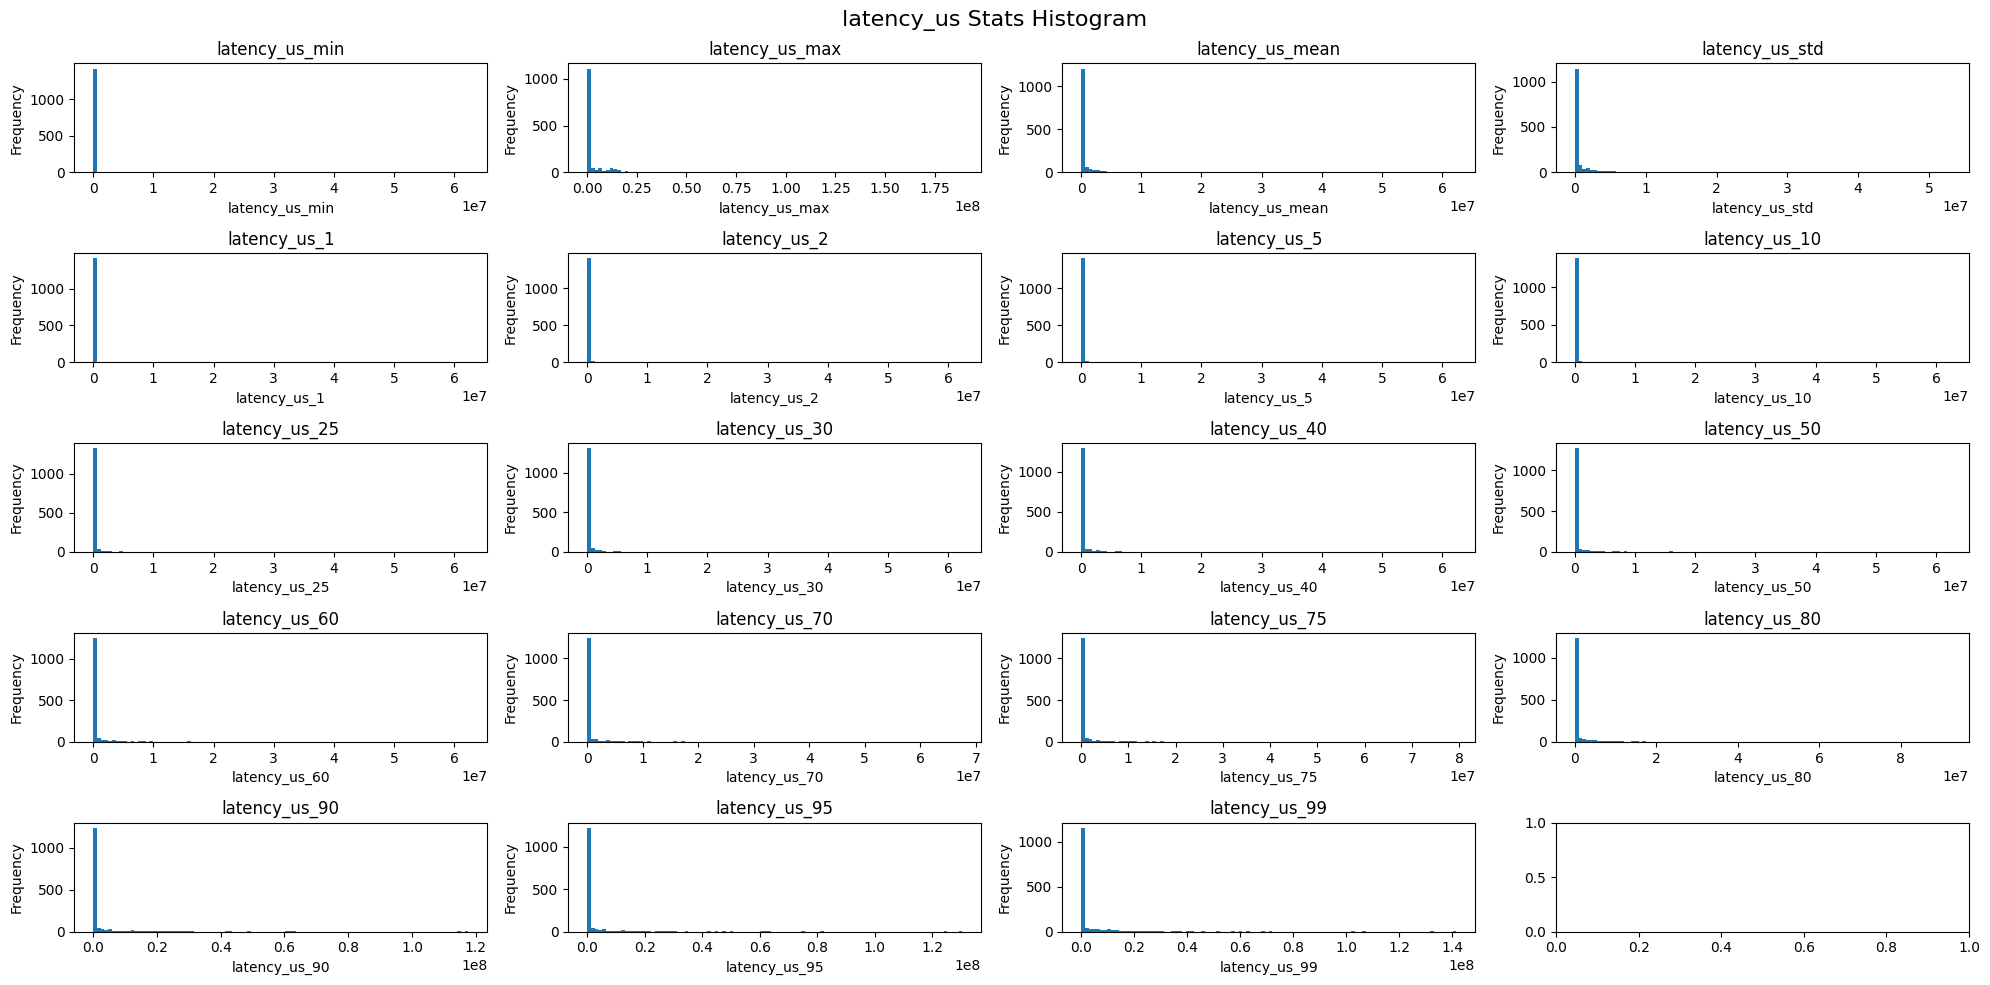

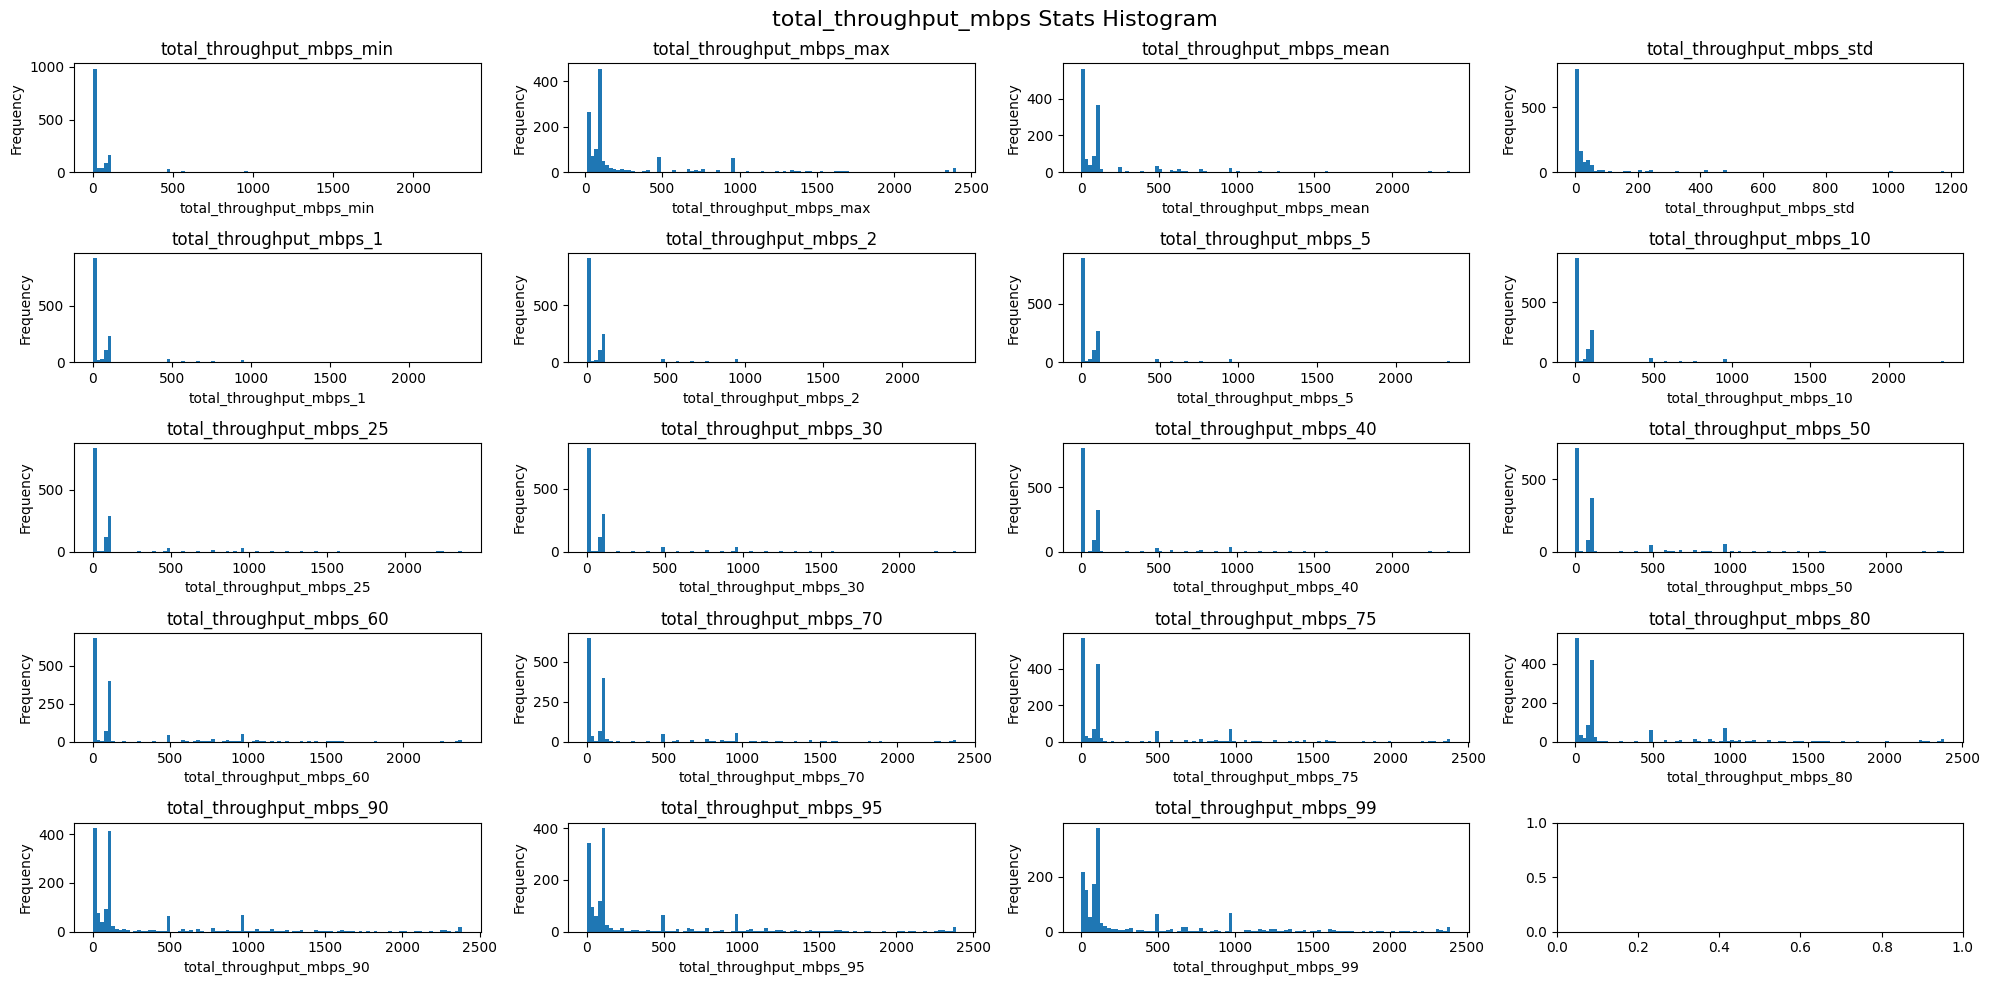

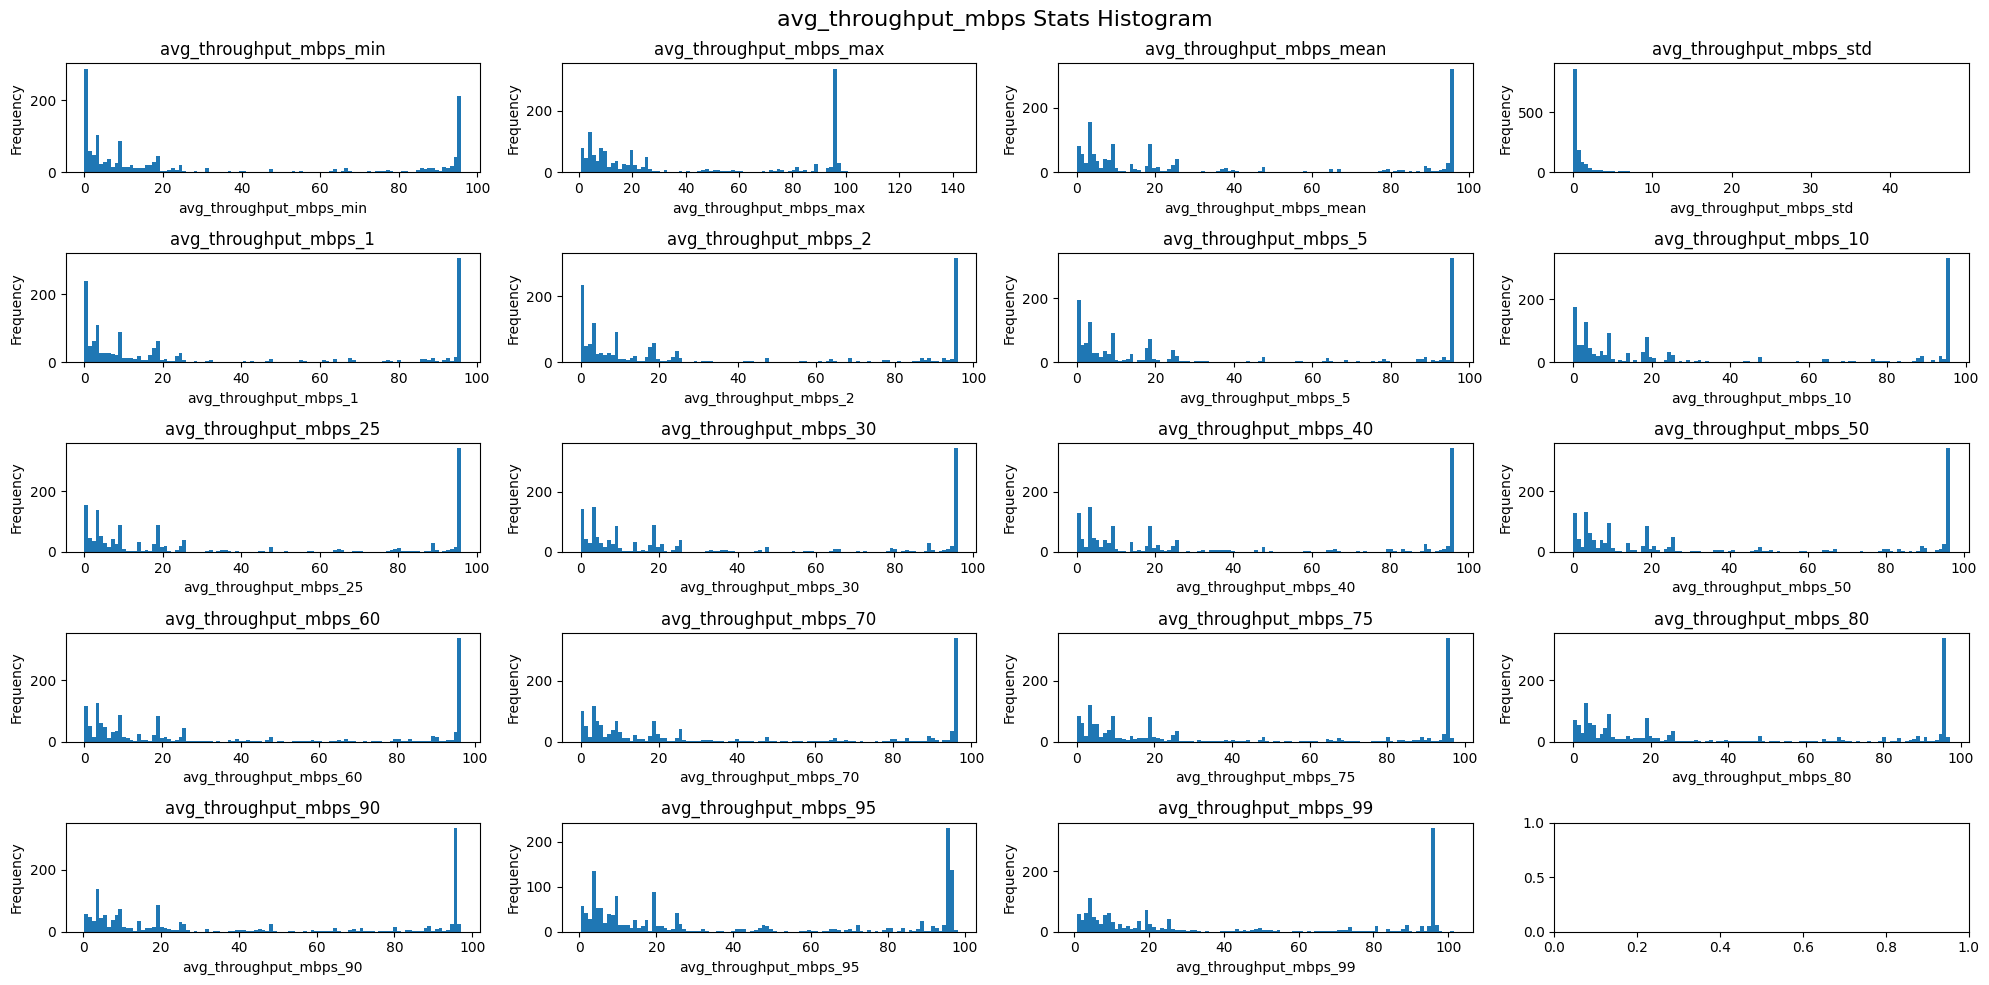

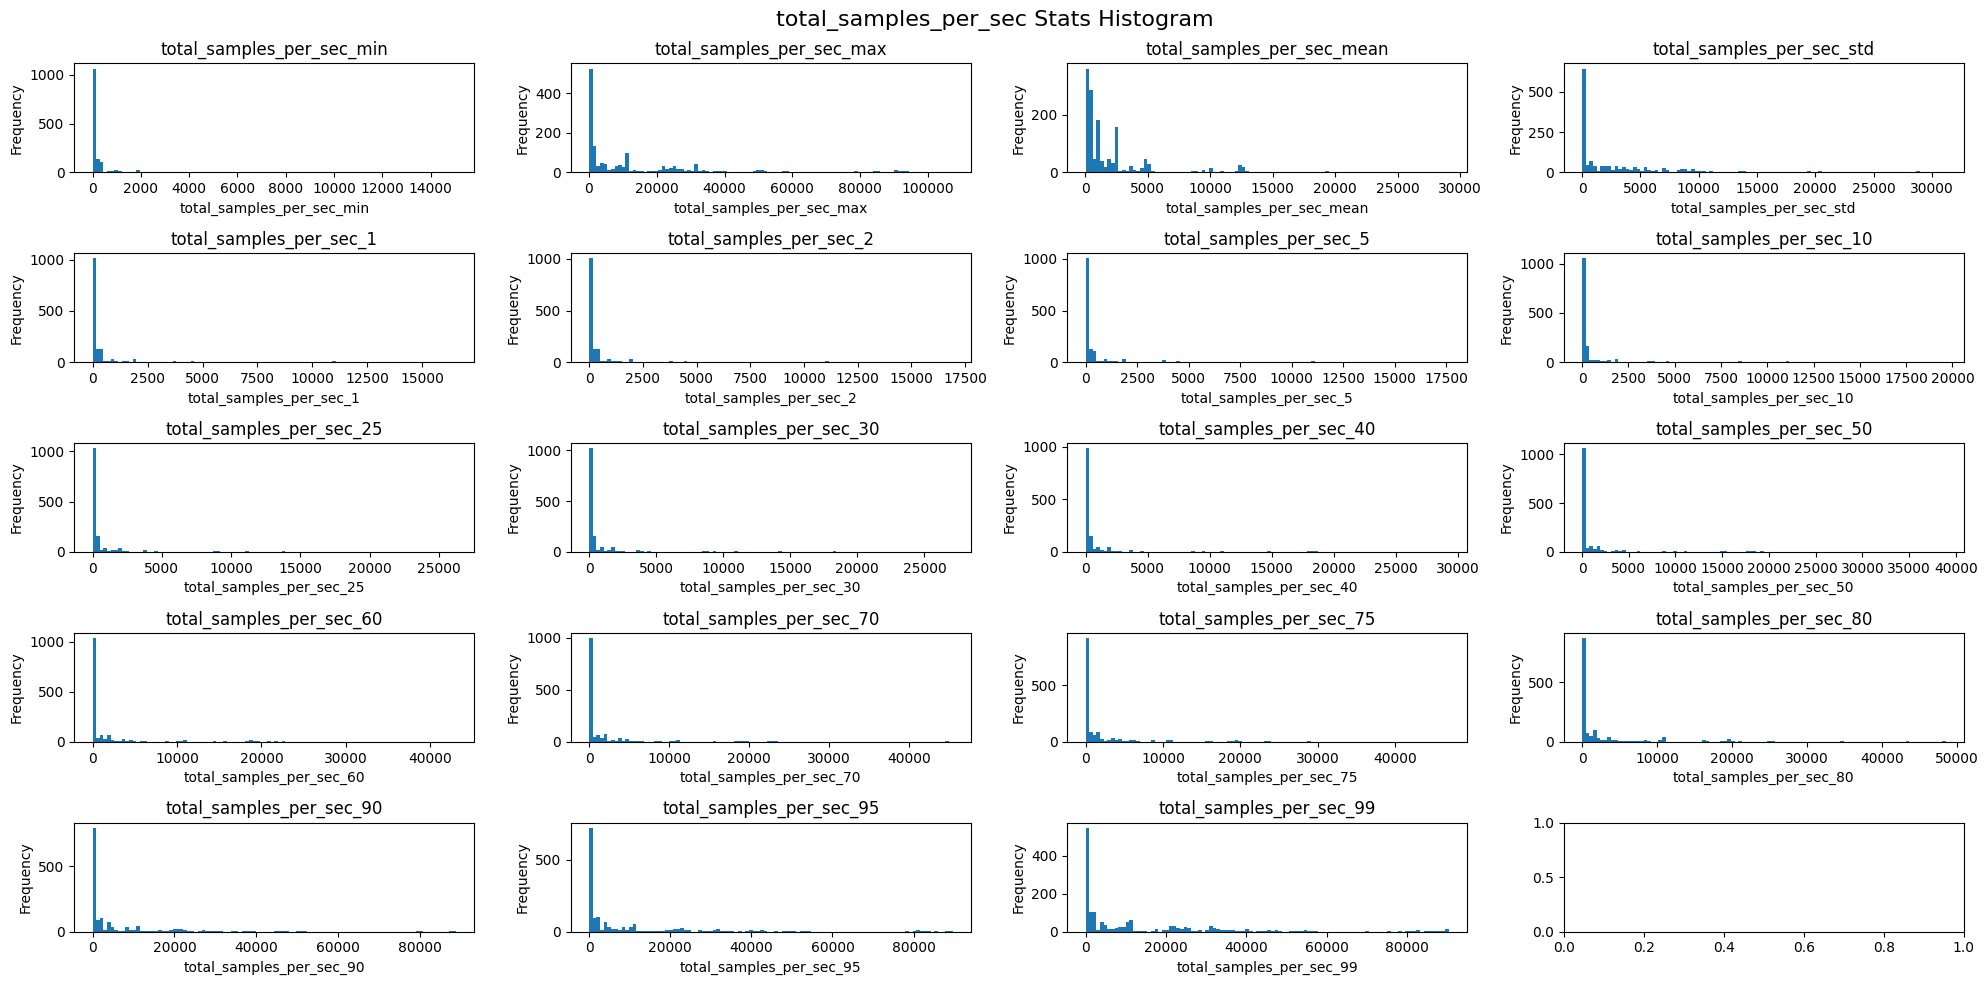

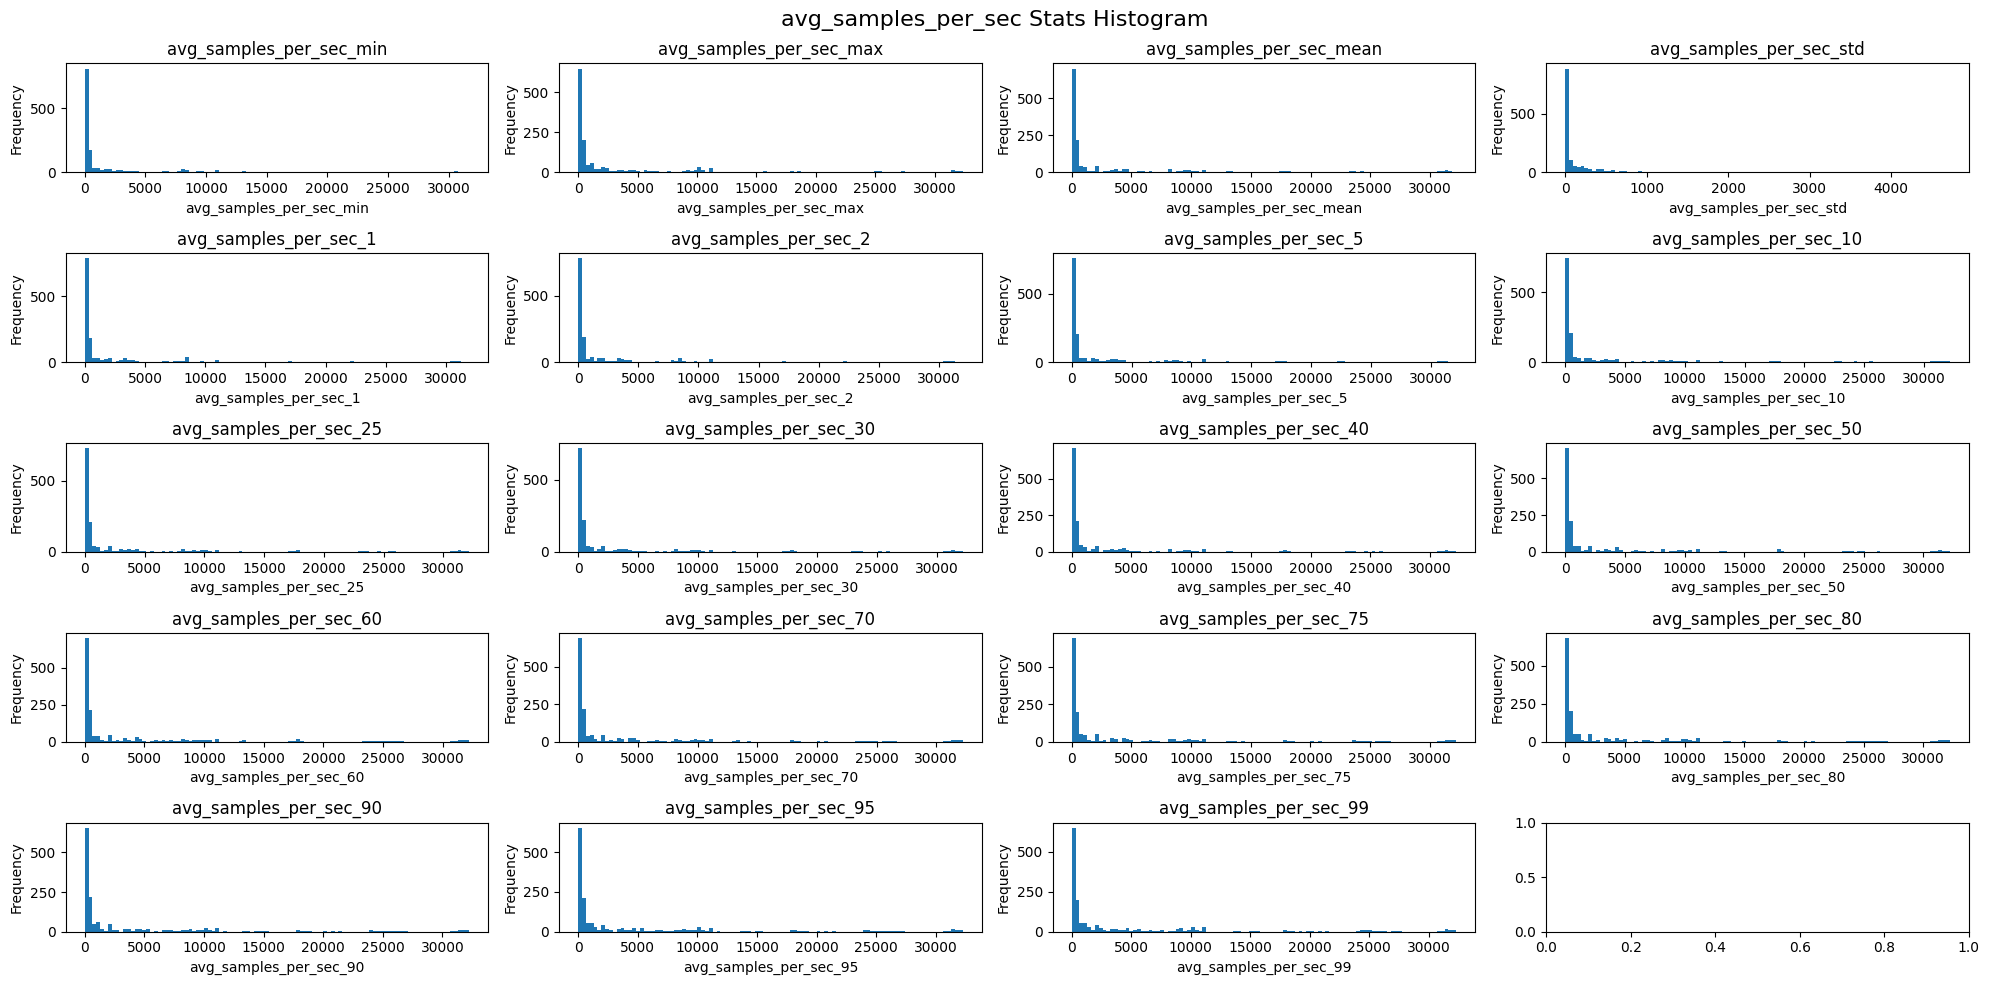

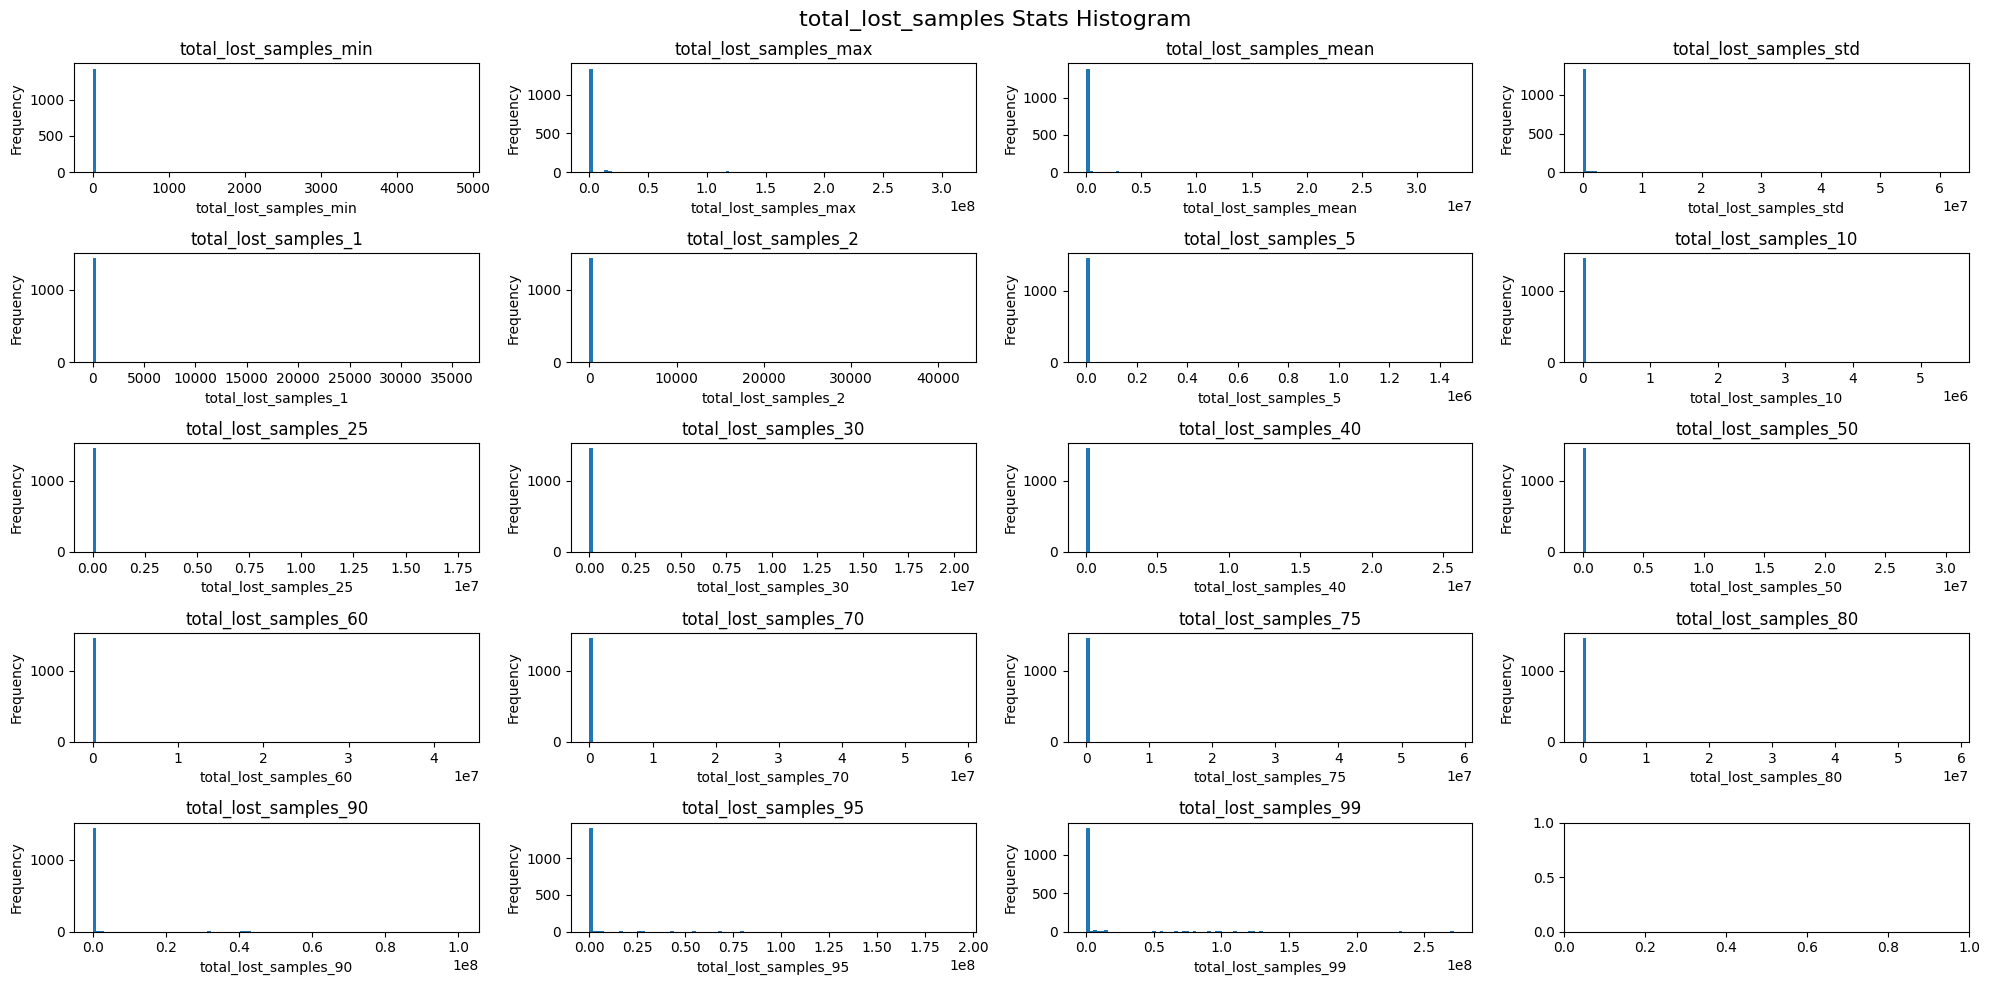

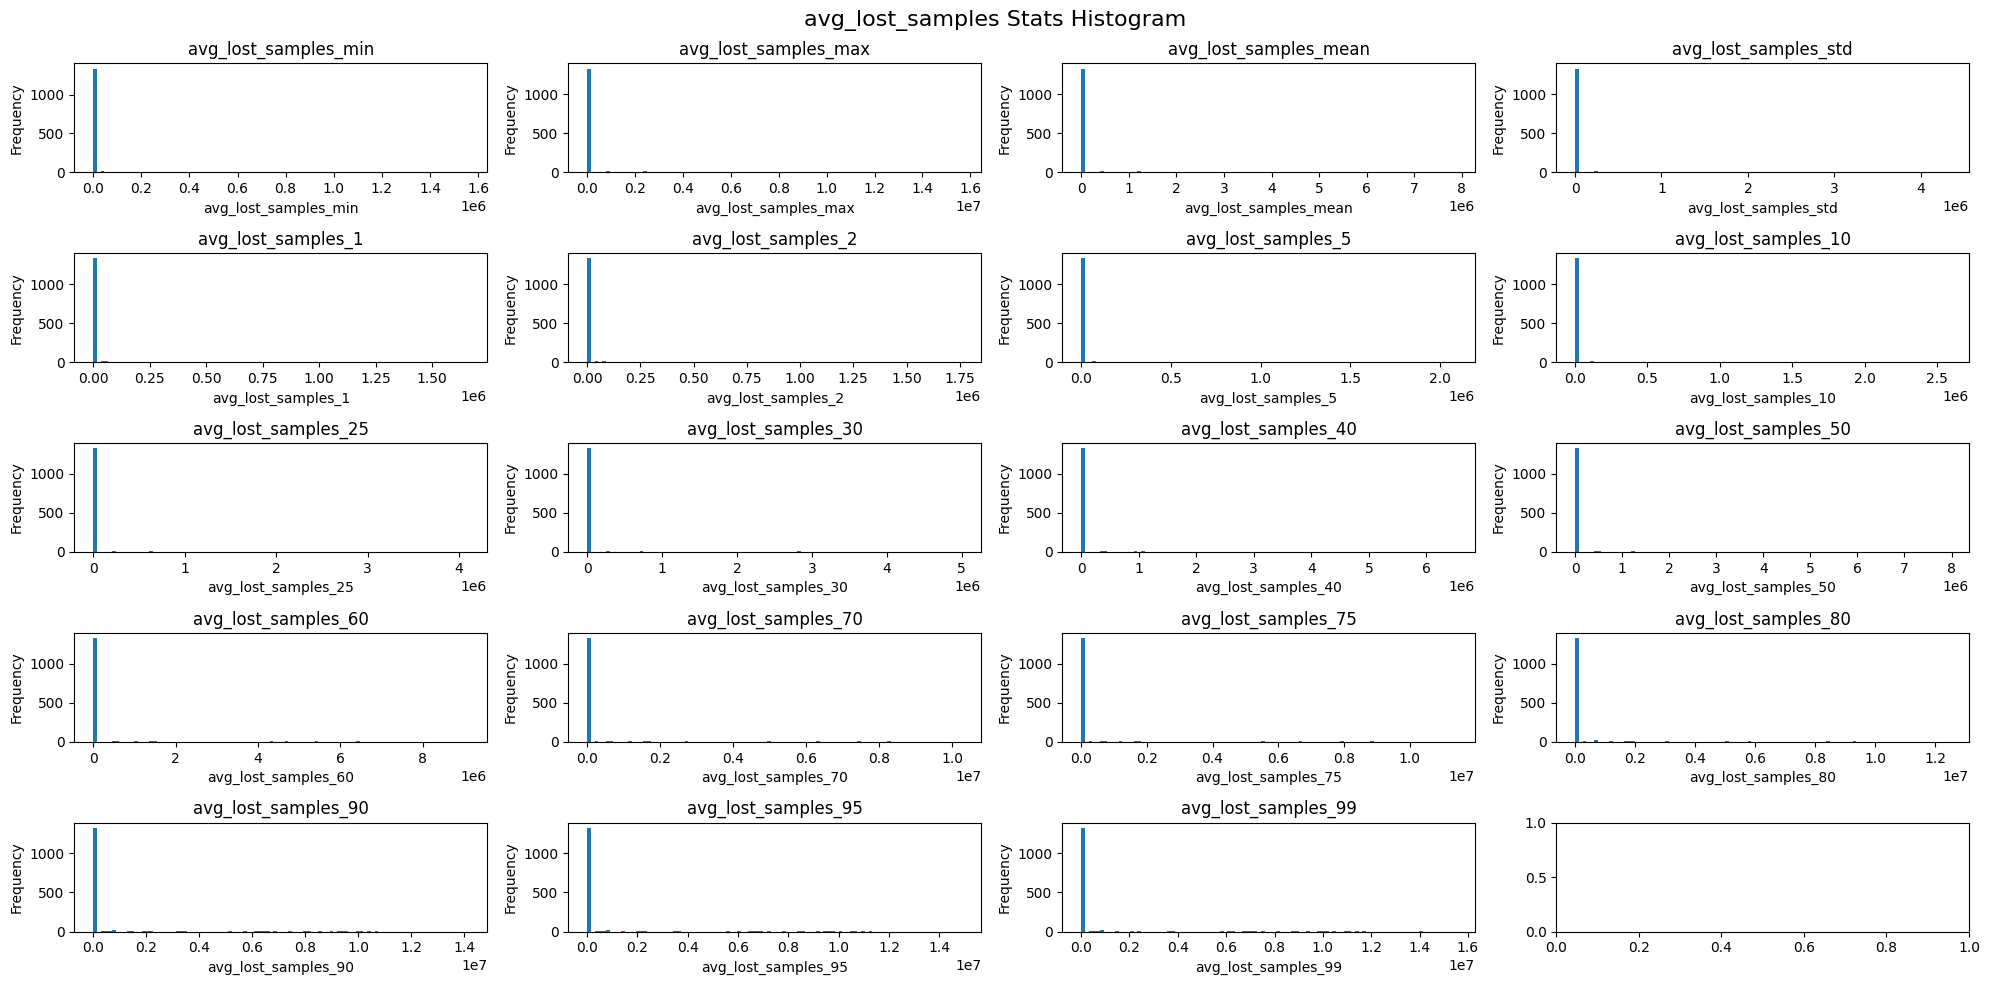

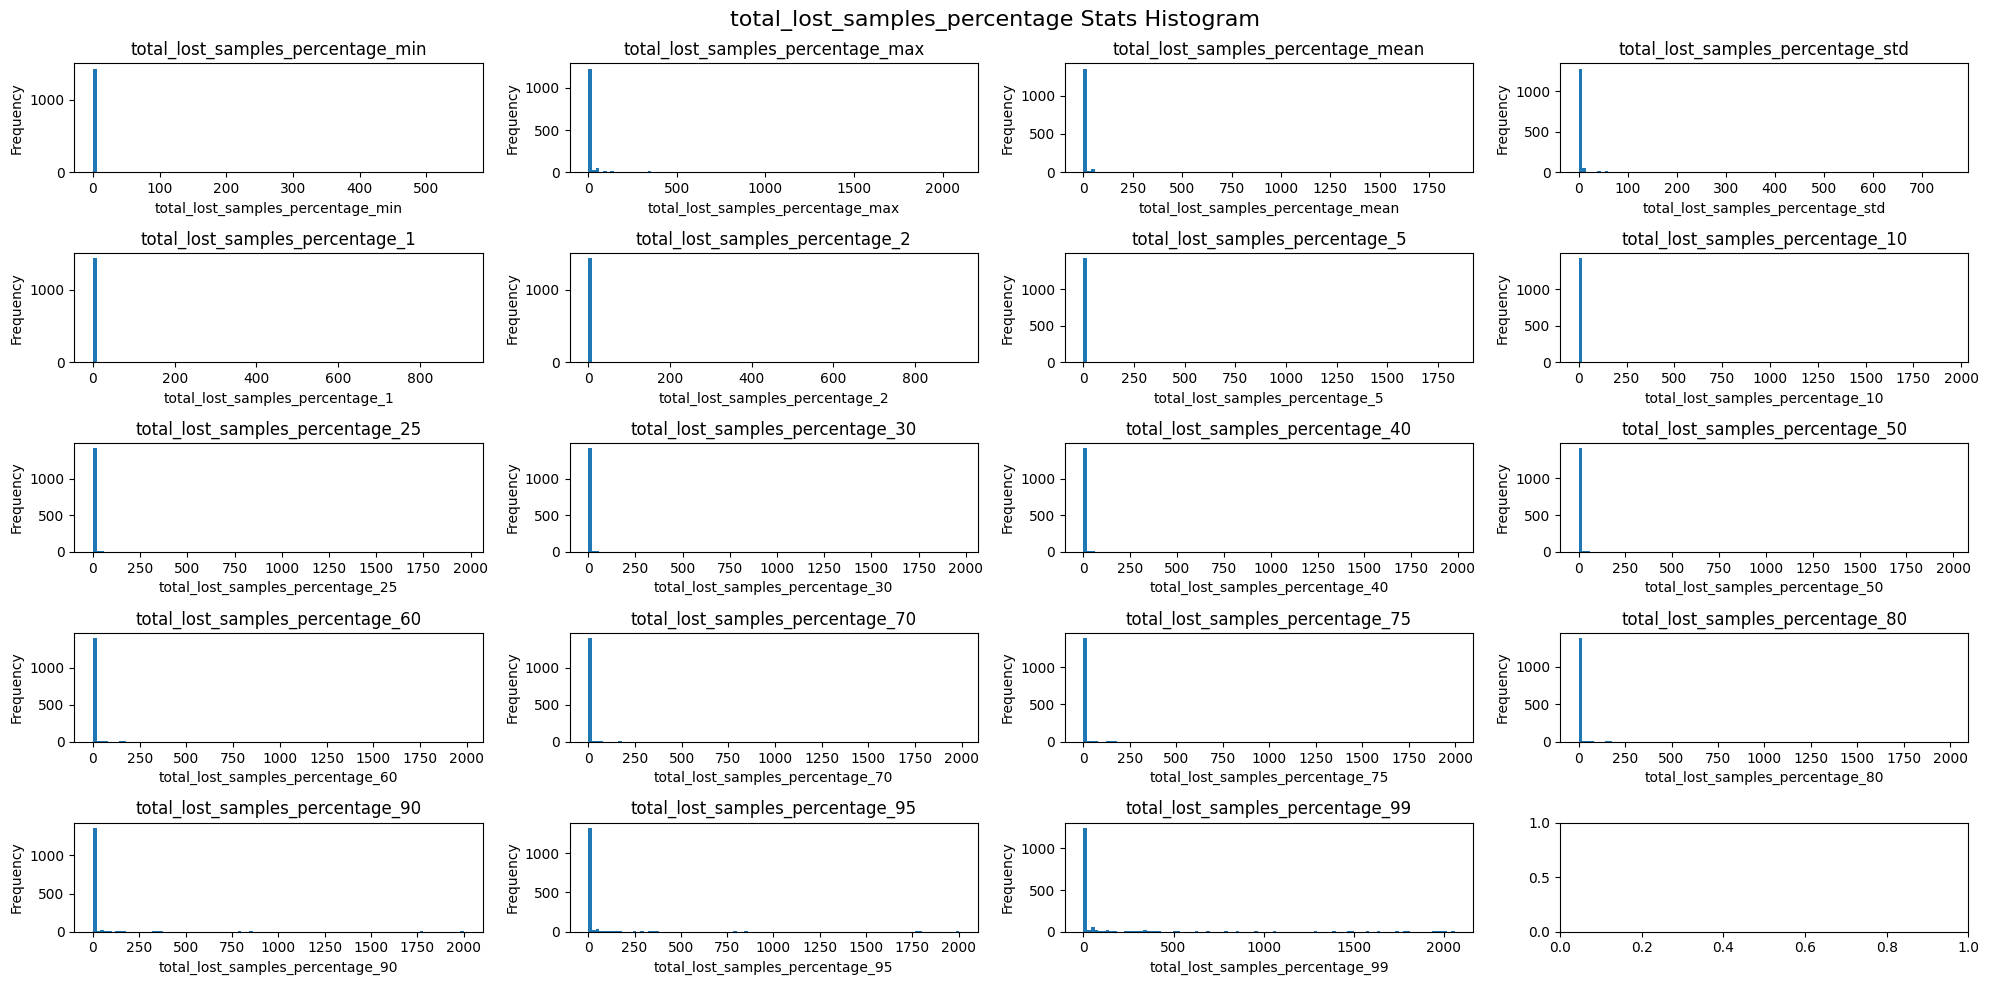

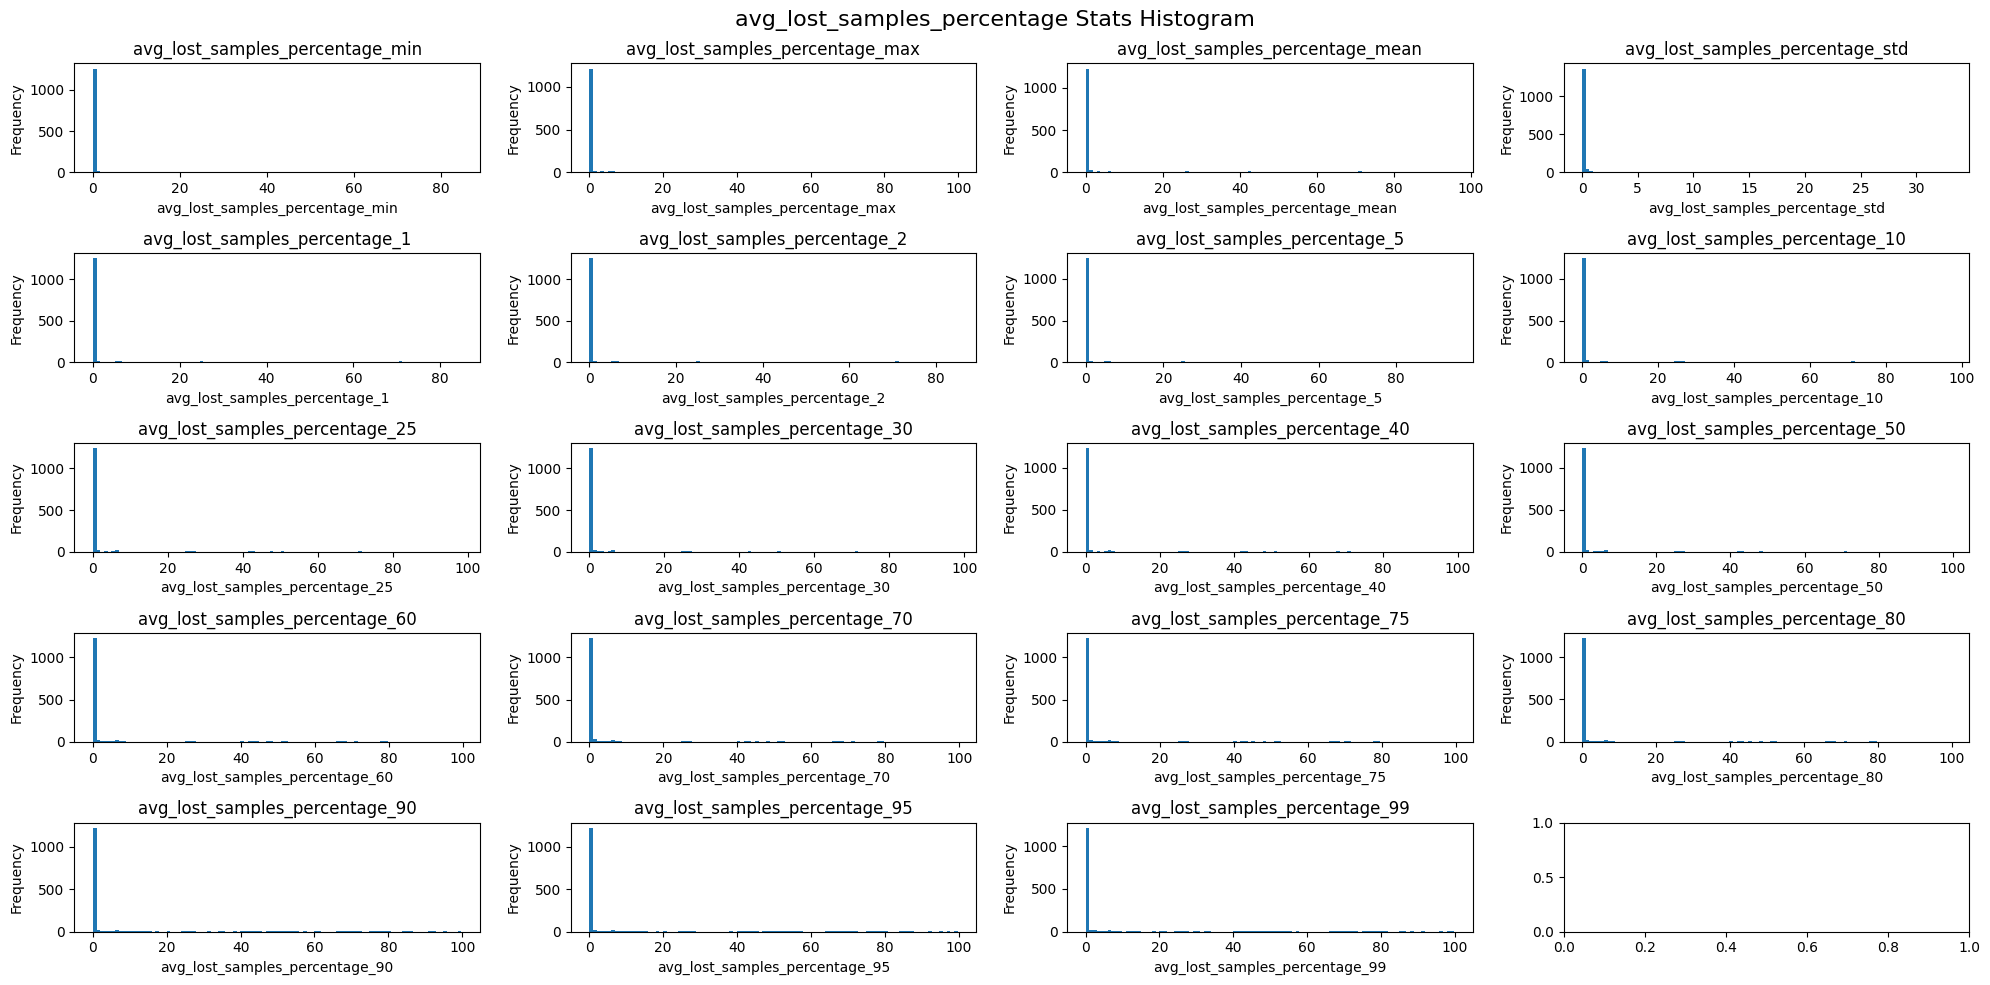

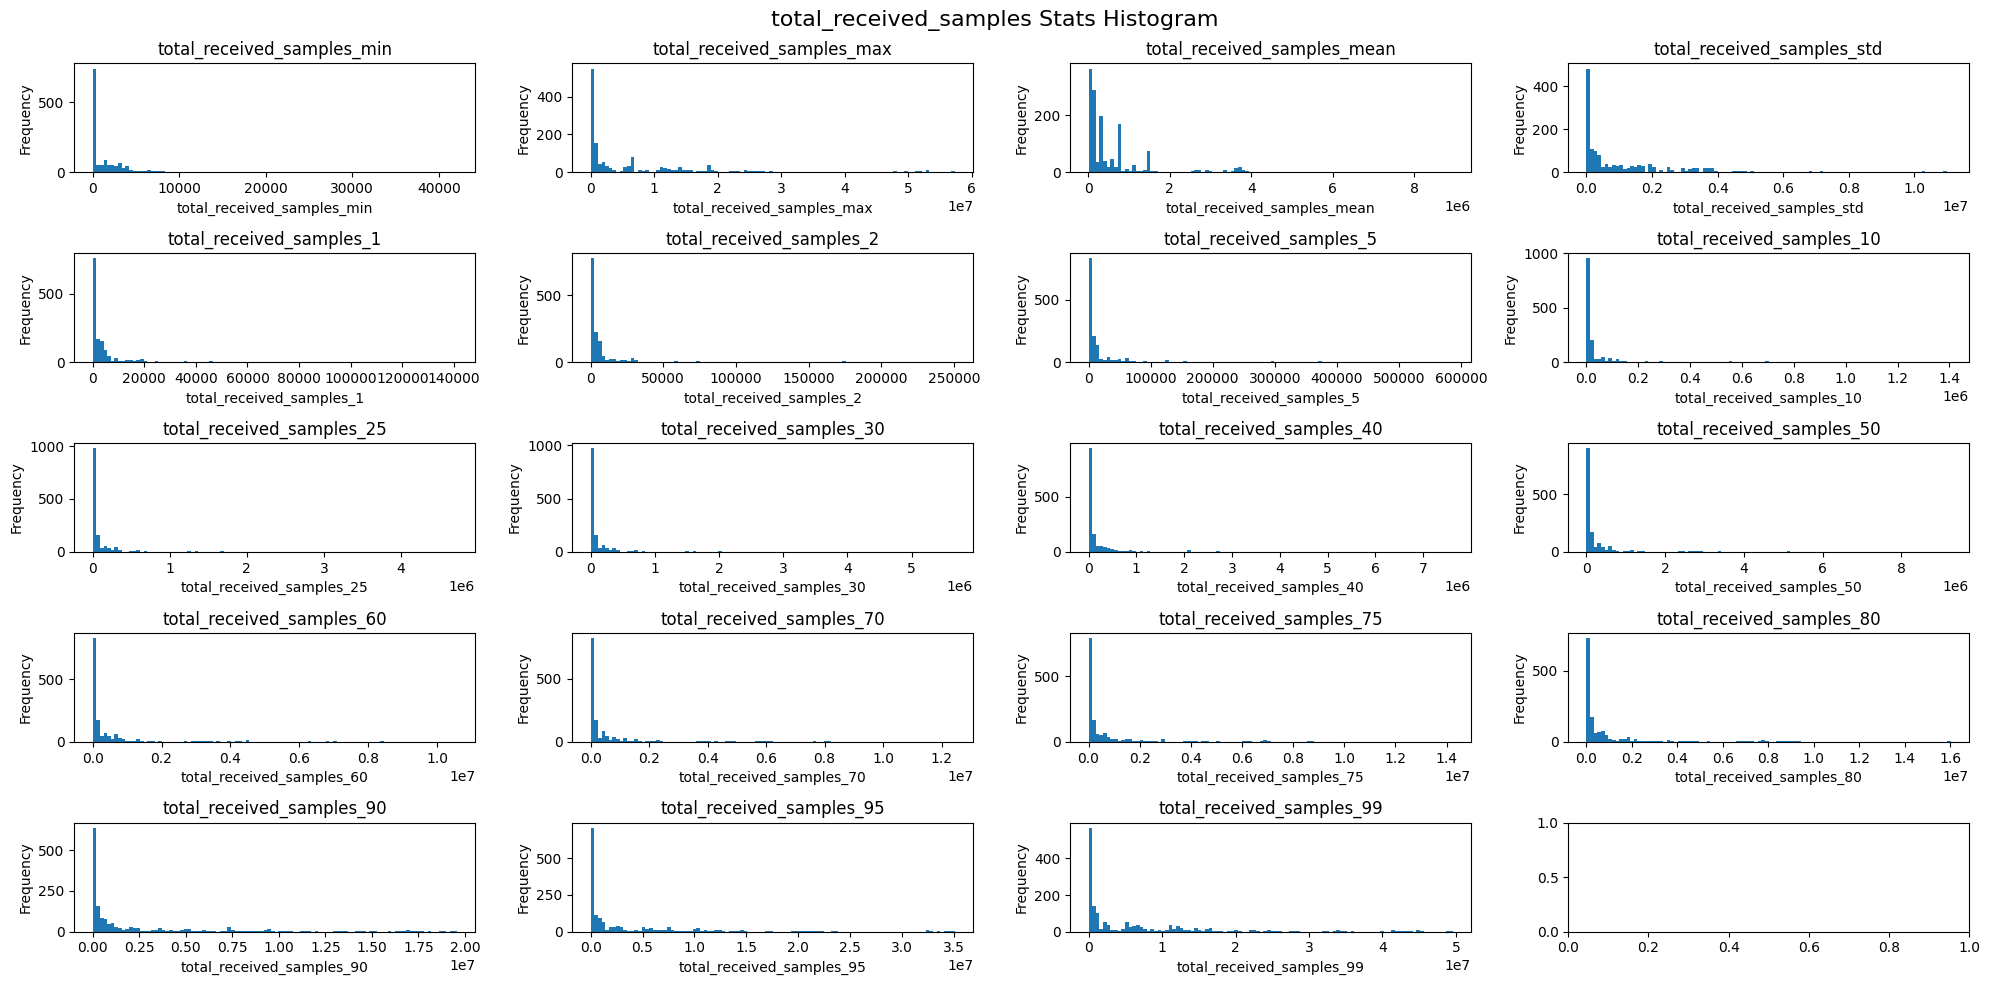

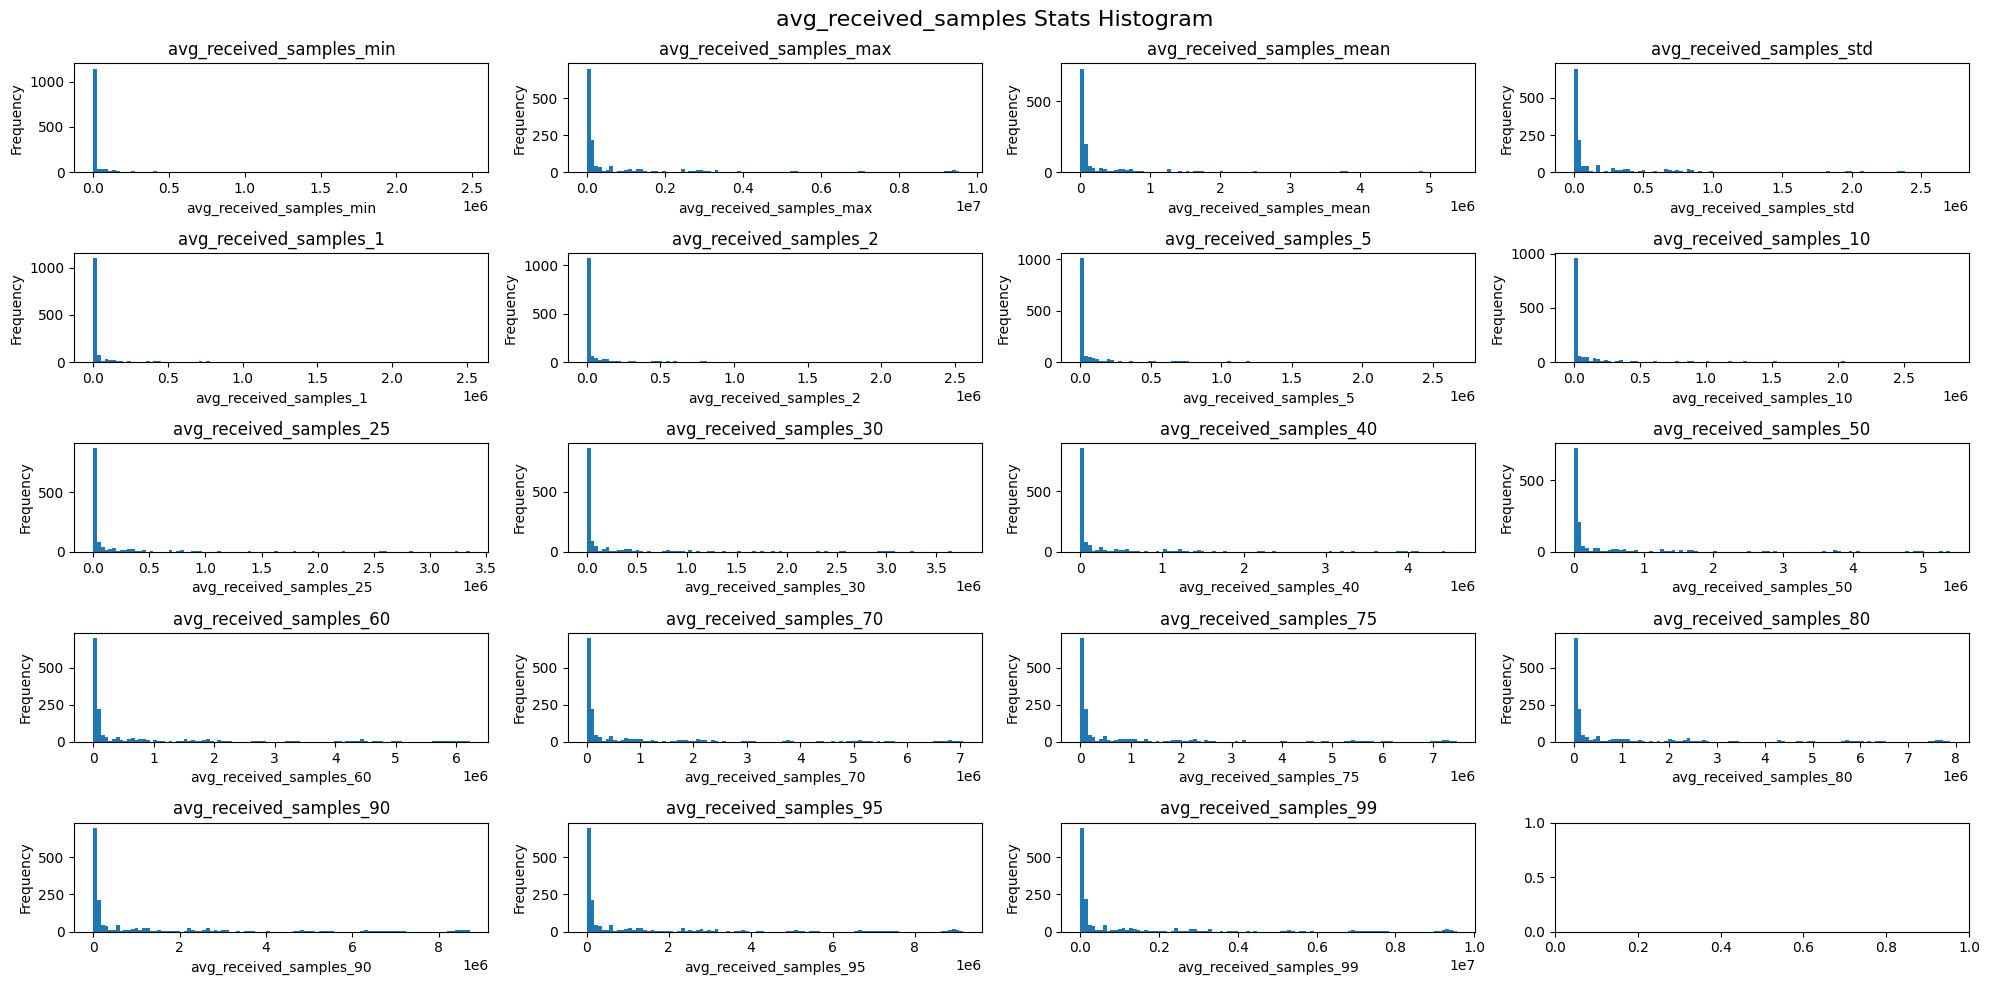

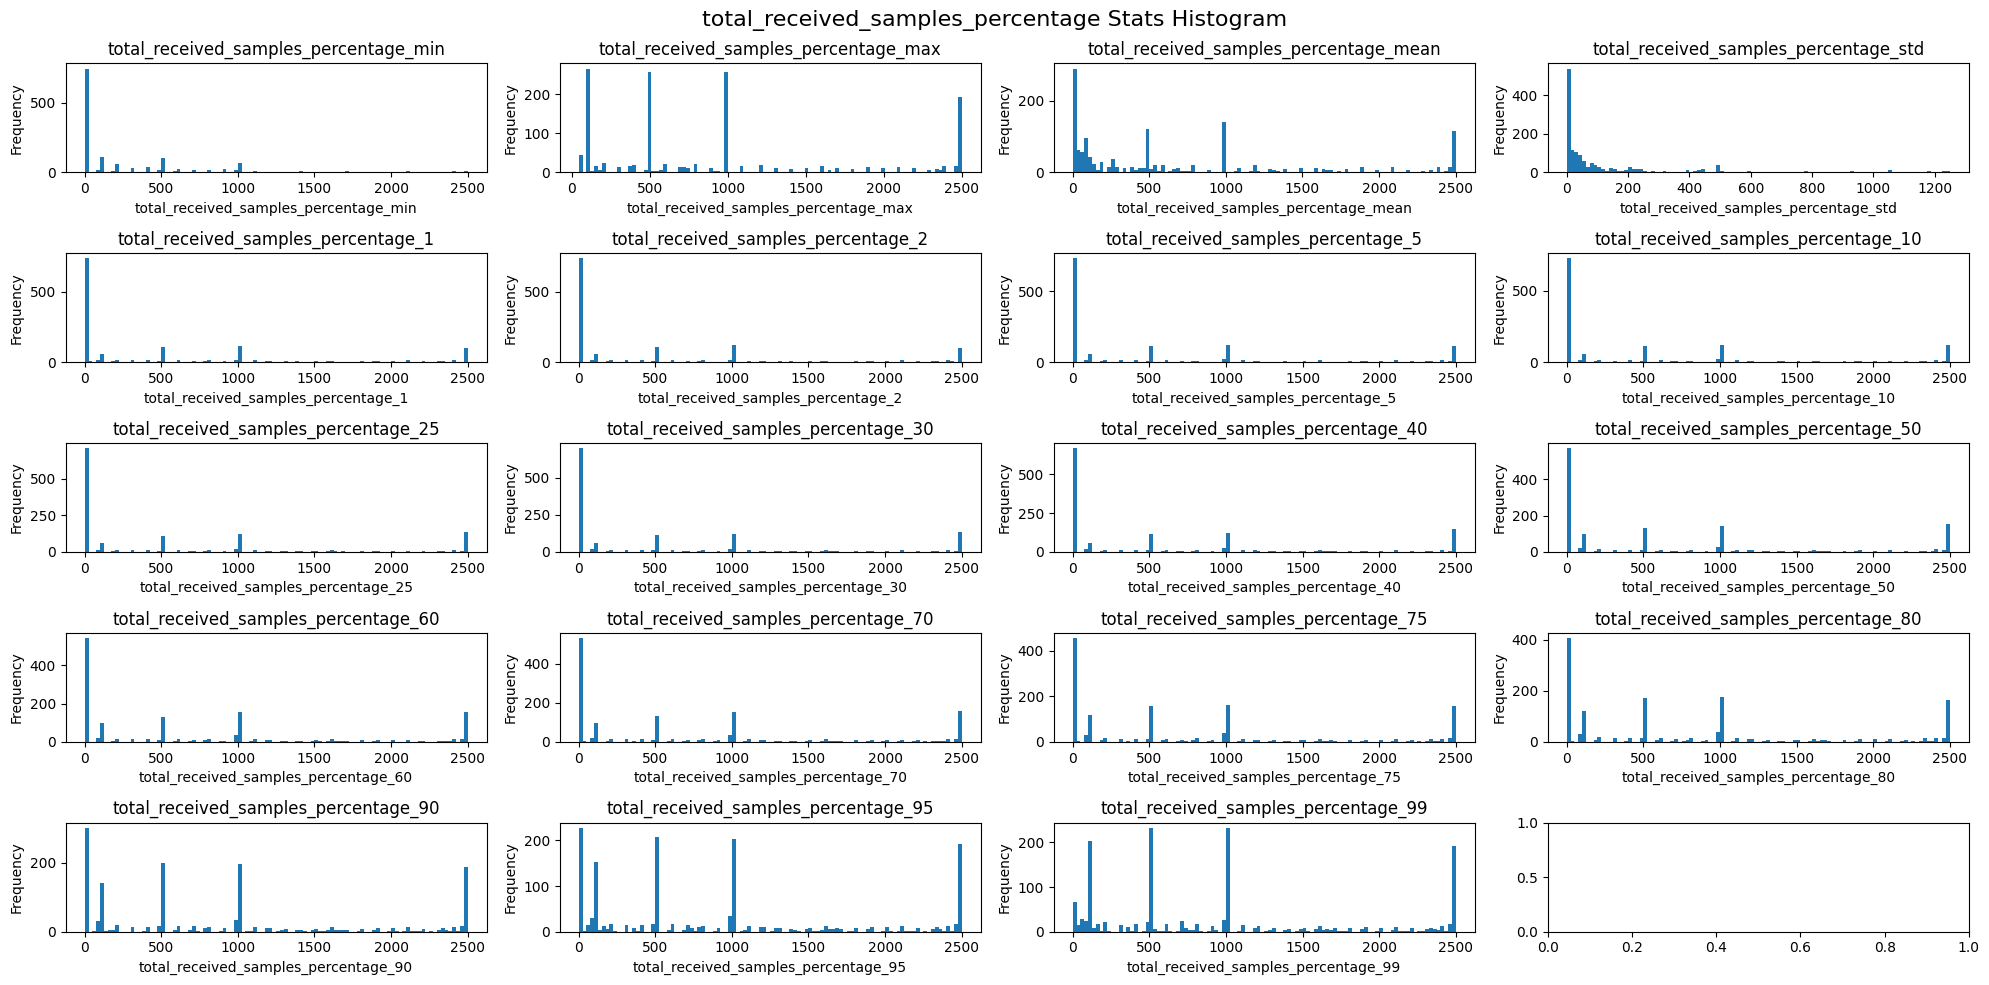

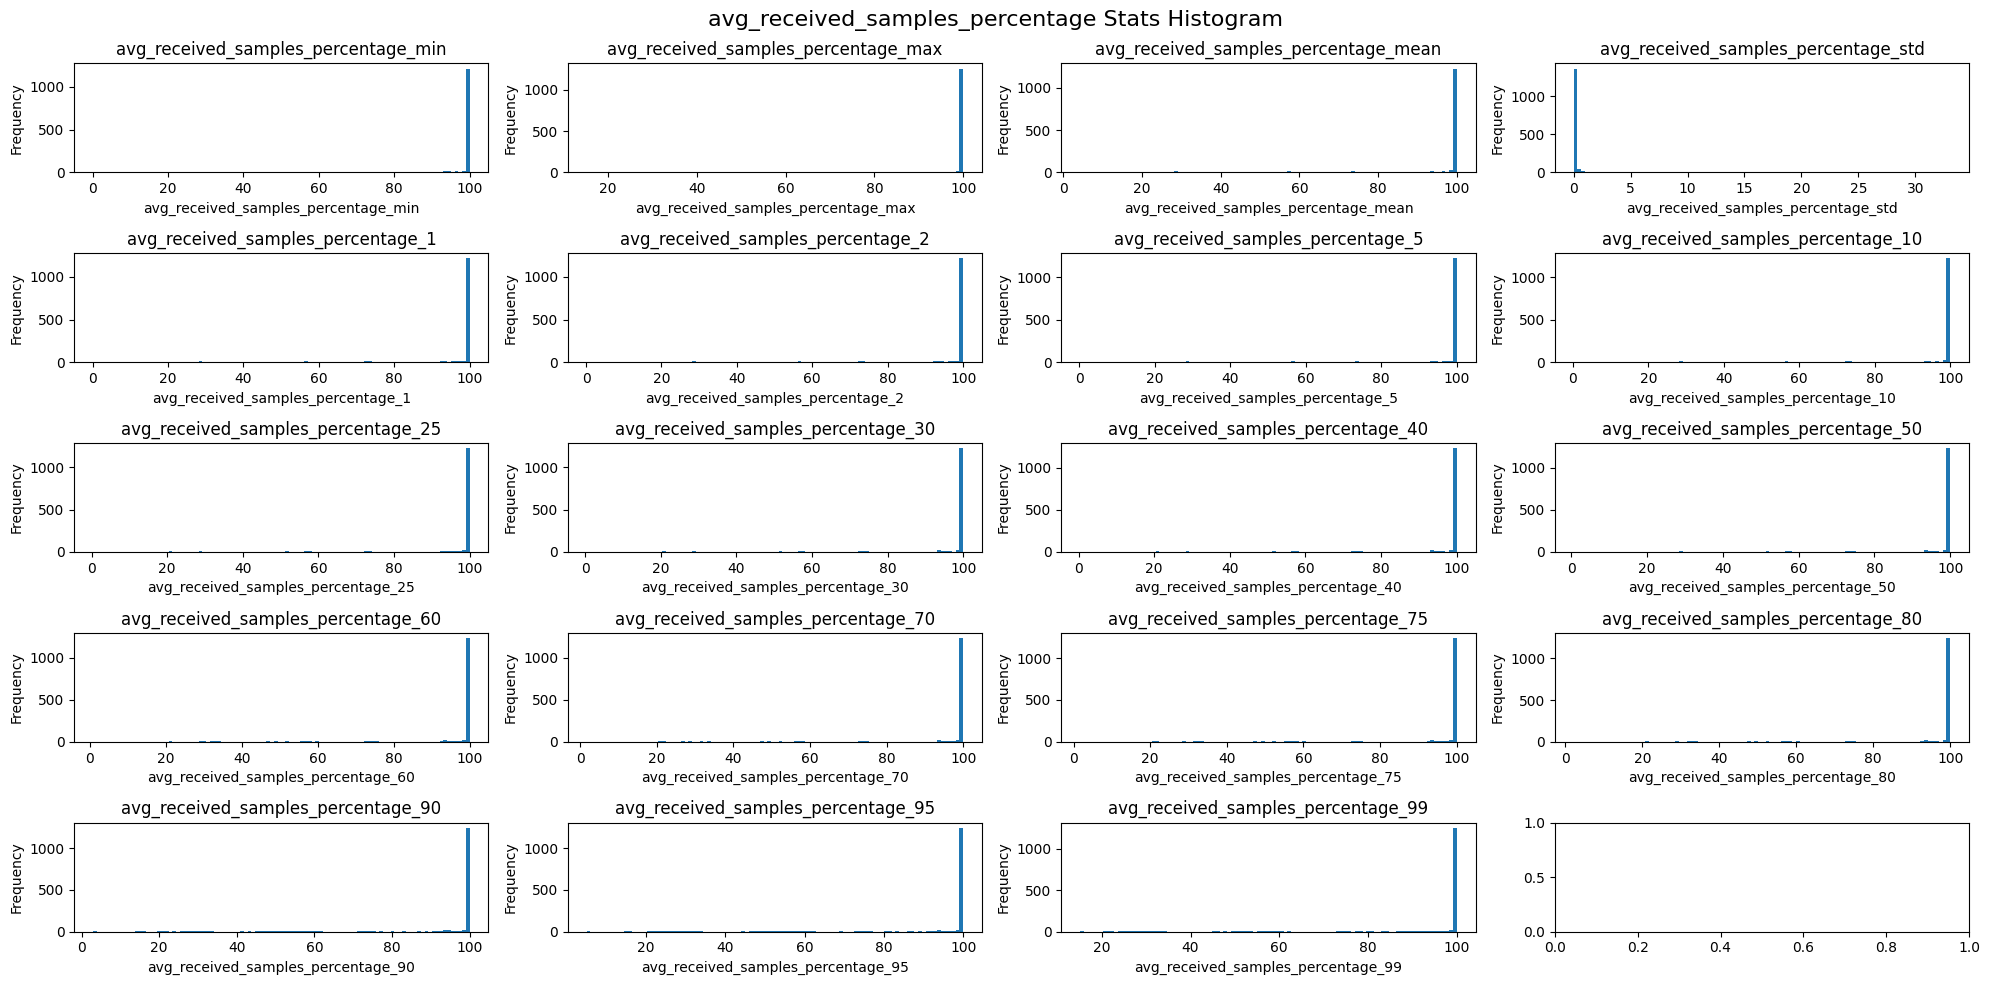

In [29]:
for METRIC in METRICS:
    metric_stat_col_names = []

    for STAT in STATS:
        metric_stat_col_names.append(f"{METRIC}_{STAT}")

    for metric_stat_col in metric_stat_col_names:
        if metric_stat_col not in full_df.columns:
            print(f"Metric stat column not found in full_df: {metric_stat_col}")

    metric_df = full_df[metric_stat_col_names]

    fig, axs = plt.subplots(5, 4, figsize=(20, 10))
    fig.suptitle(f"{METRIC} Stats Histogram", fontsize=16)
    
    for i, metric_col in enumerate(metric_df.columns):
        row = i // 4
        col = i % 4
        
        axs[row, col].hist(metric_df[metric_col], bins=100)
        axs[row, col].set_title(metric_col)
        axs[row, col].set_xlabel(metric_col)
        axs[row, col].set_ylabel("Frequency")

    plt.tight_layout()
    plt.show()
        

# Boxplots Per Metric Stats

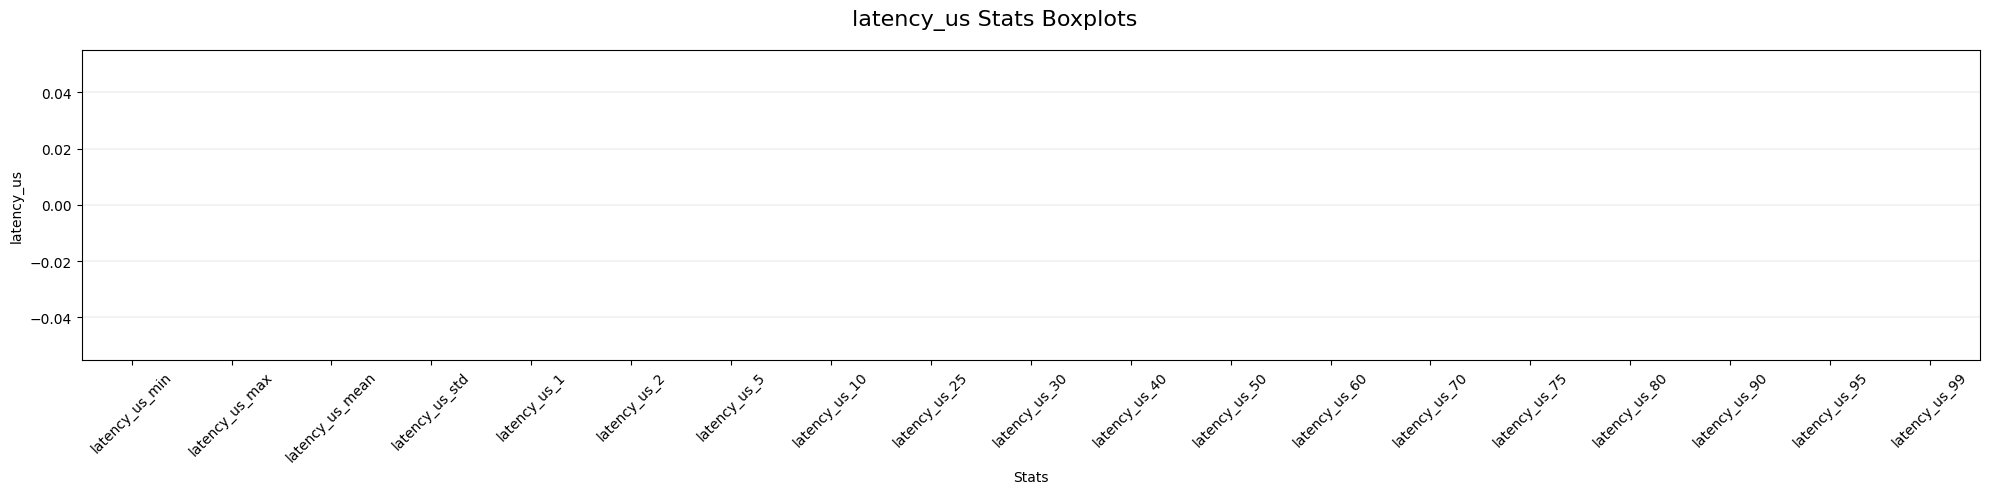

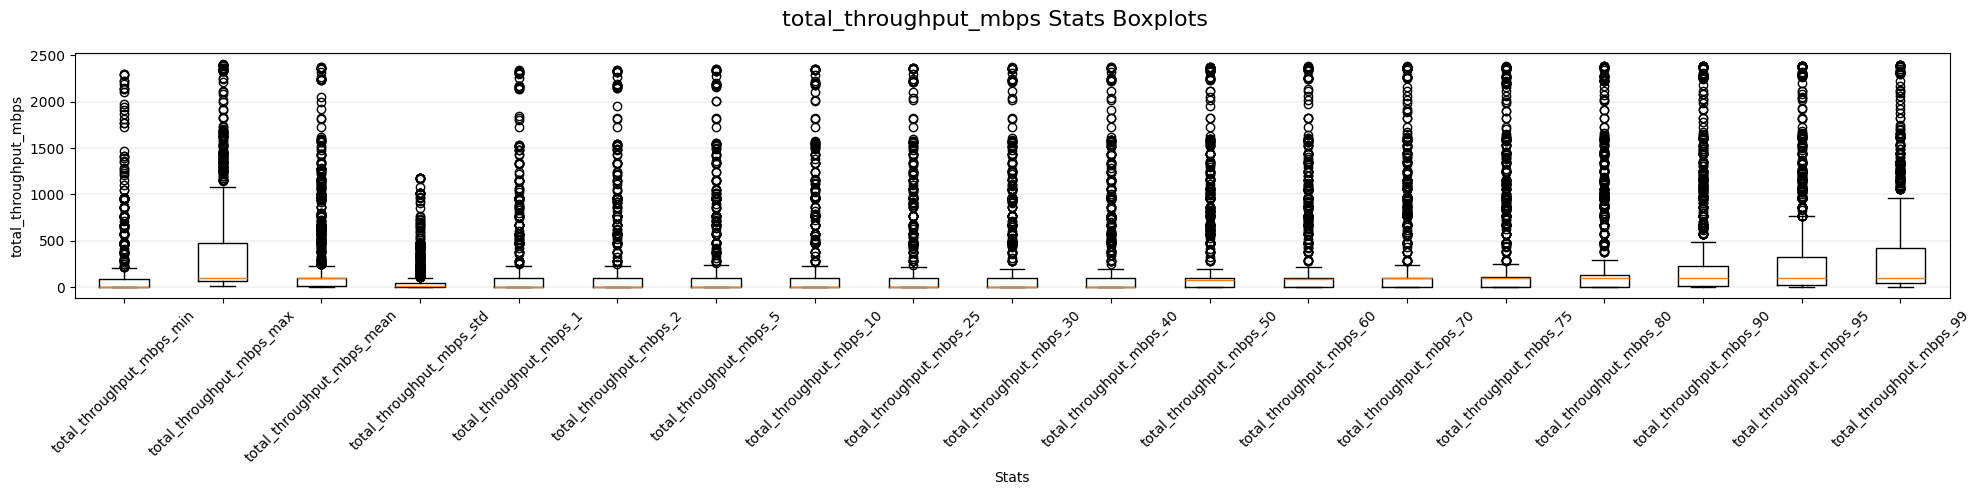

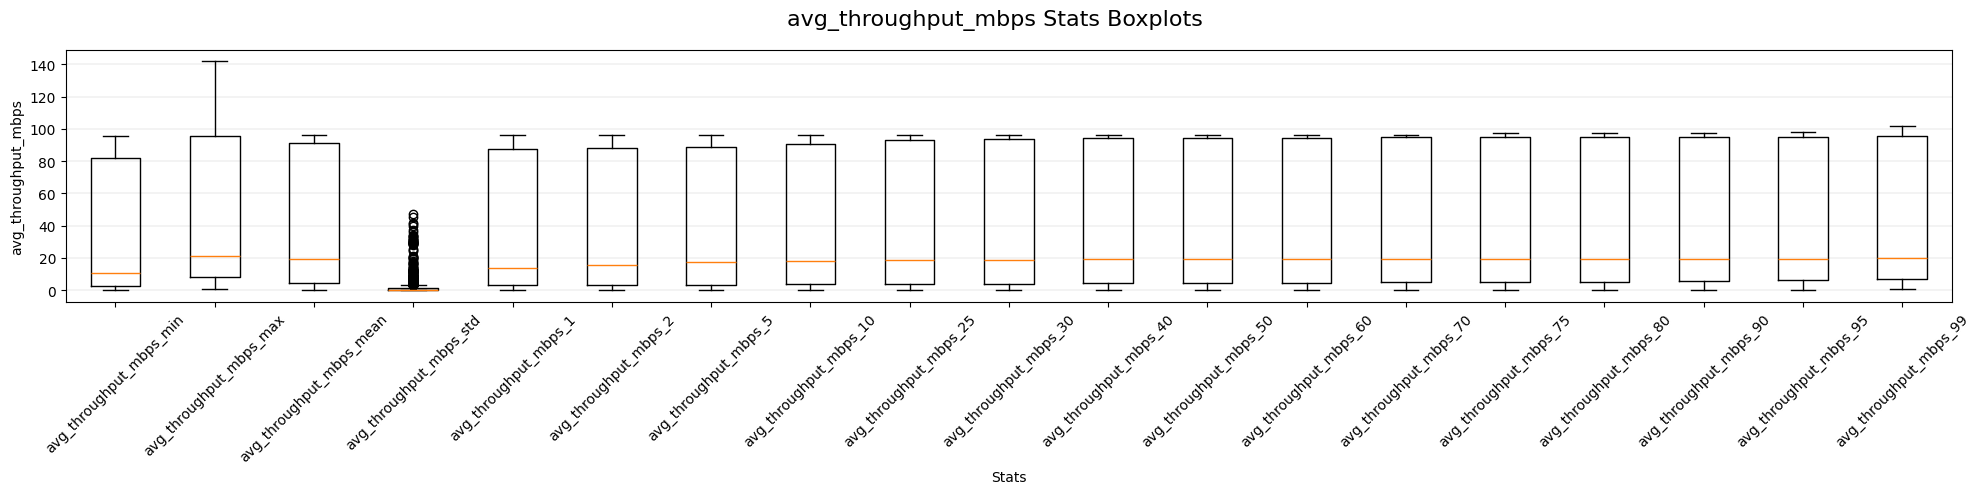

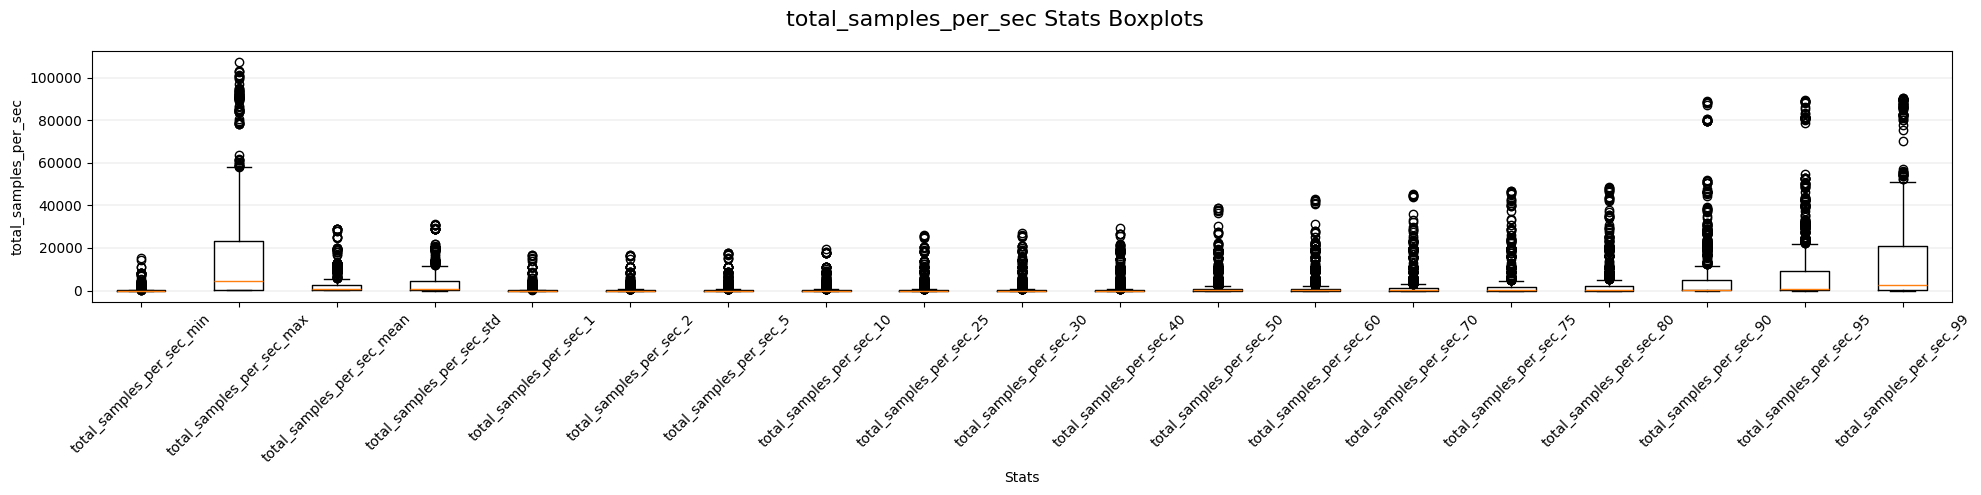

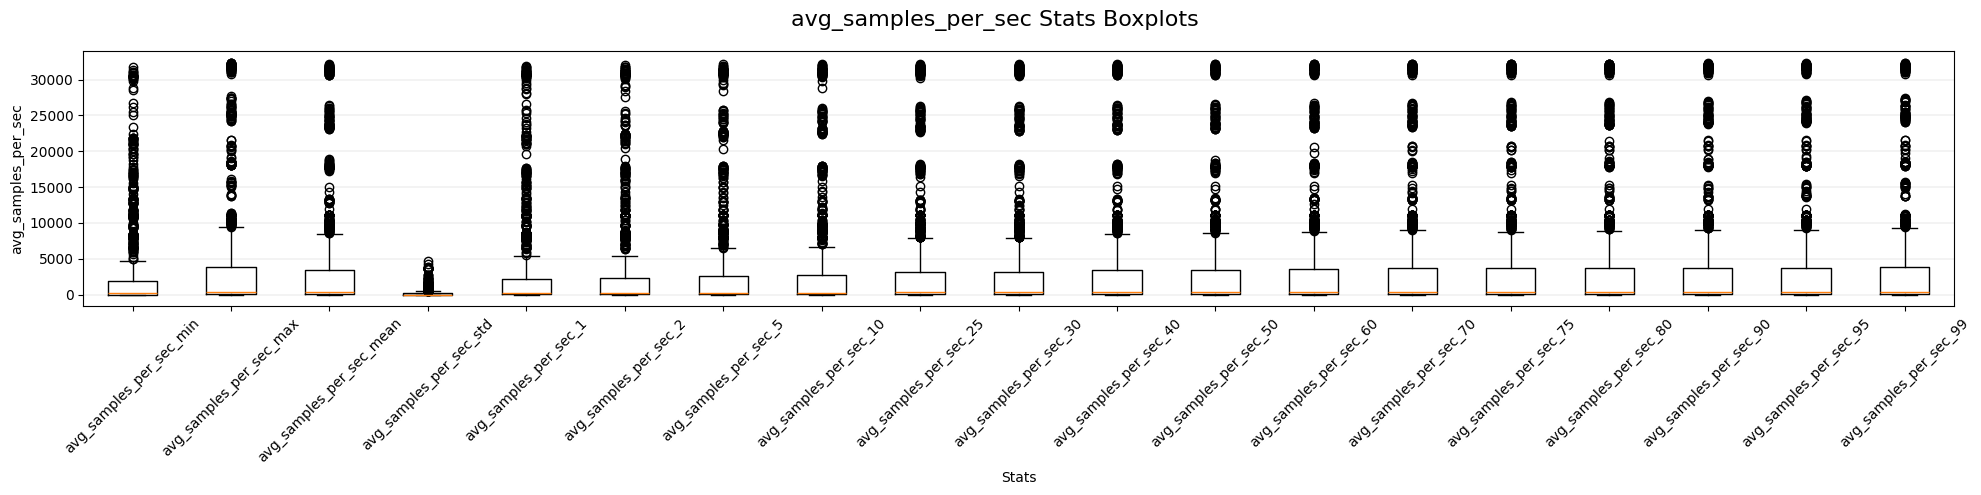

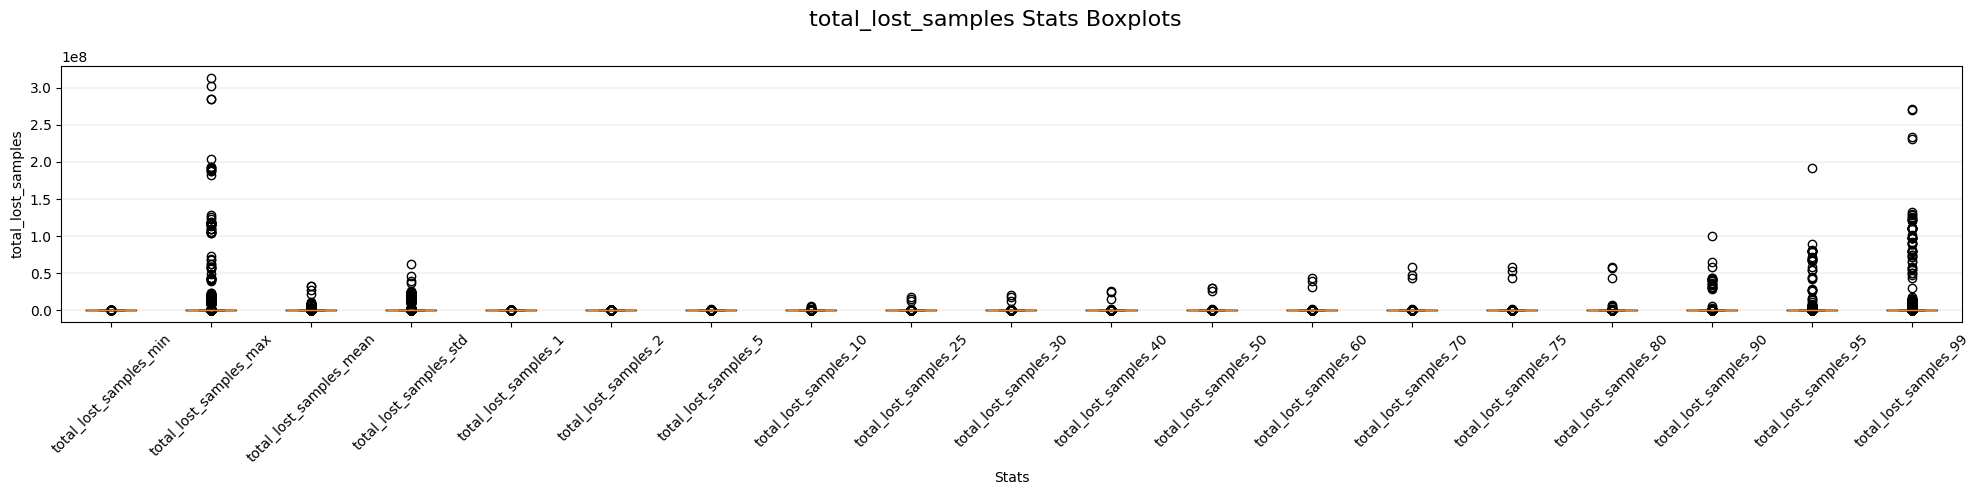

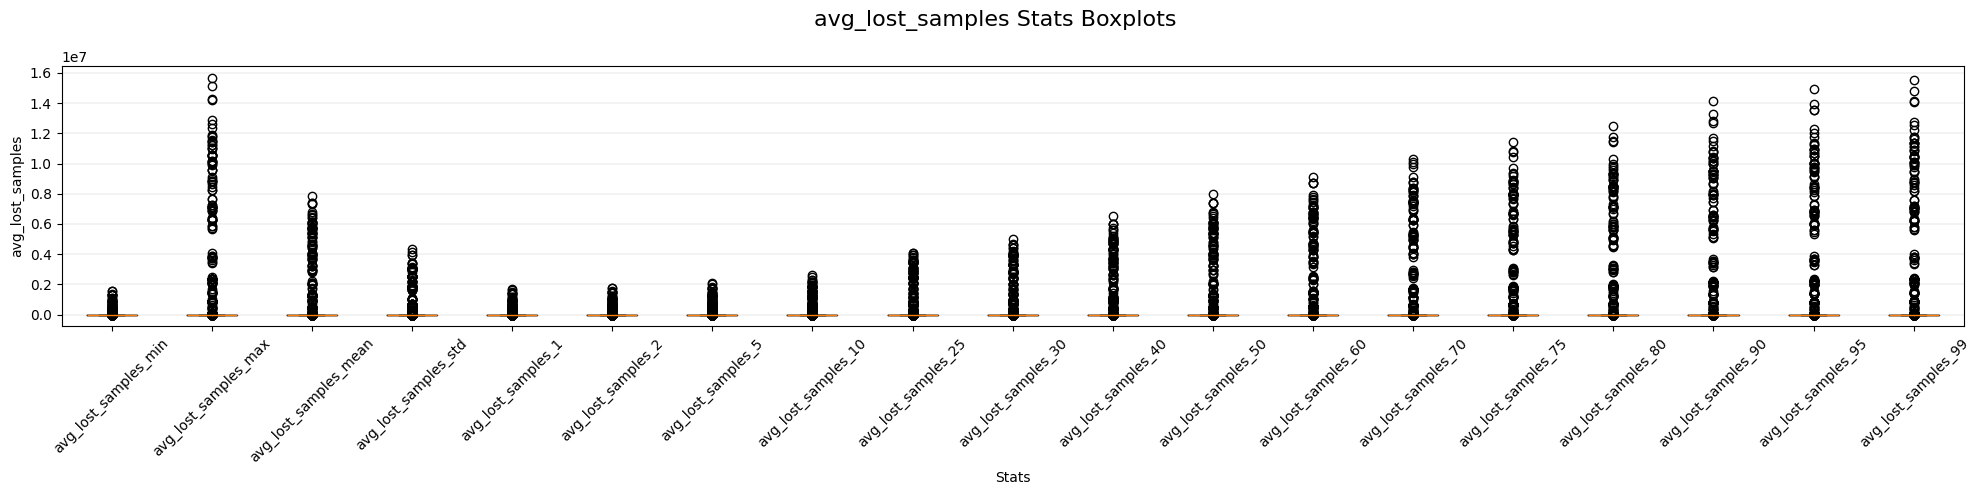

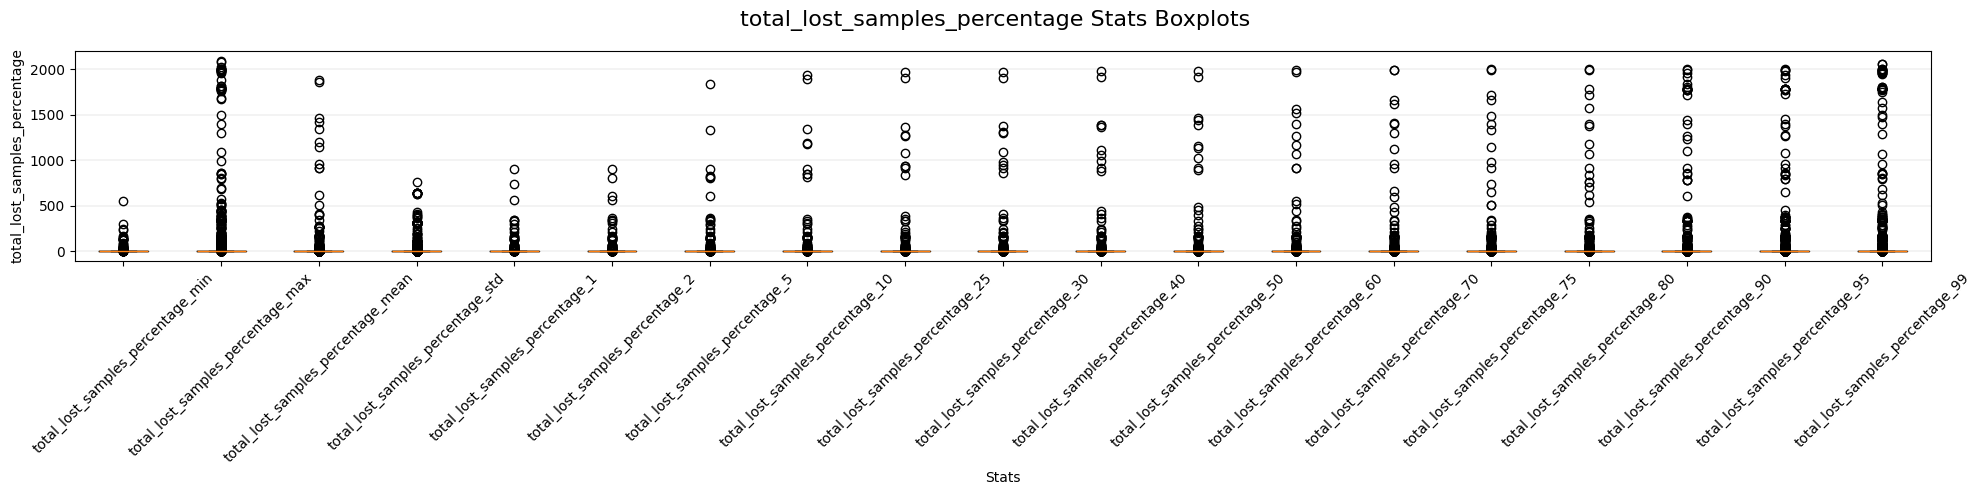

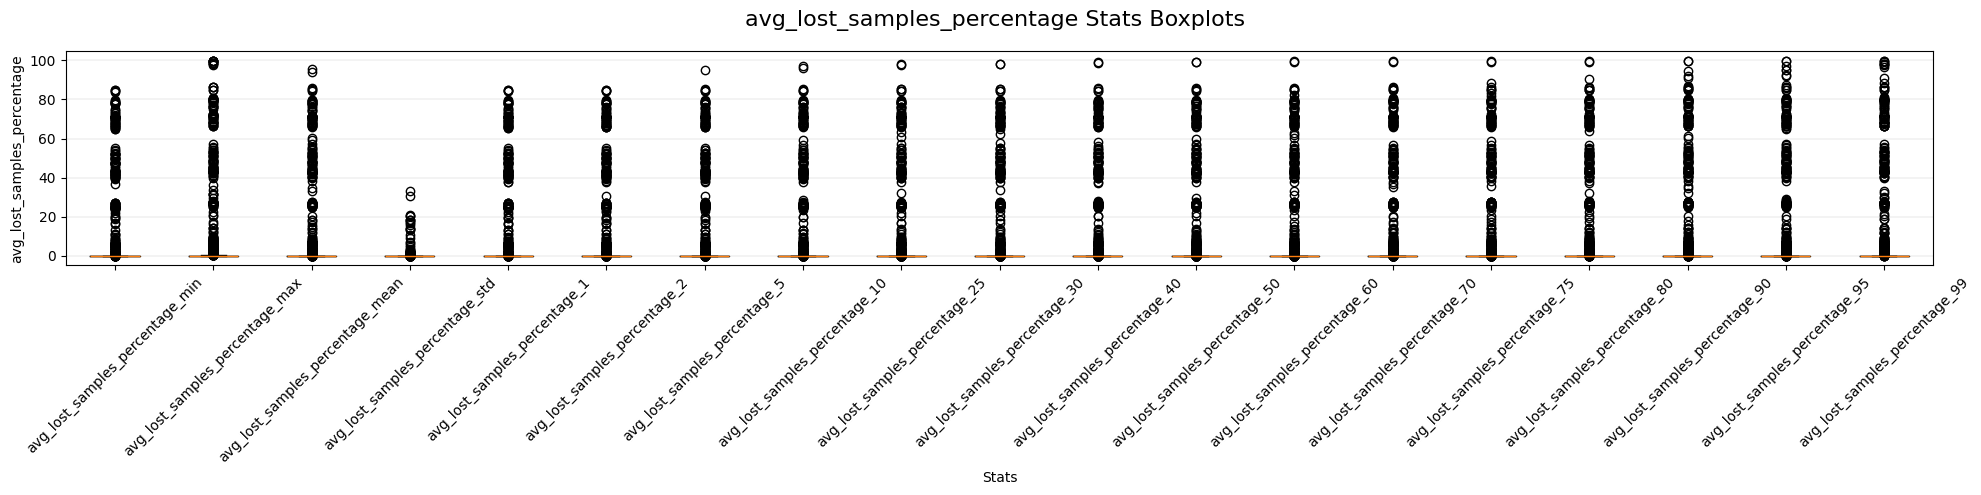

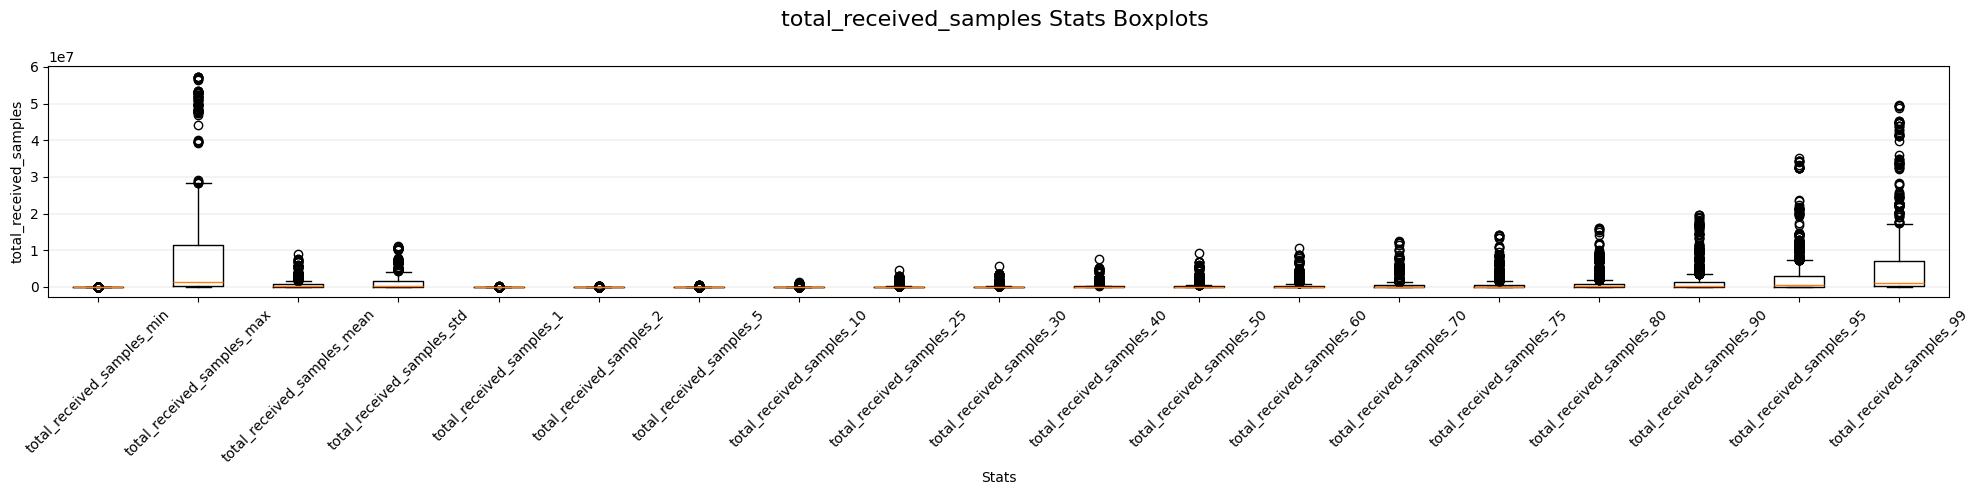

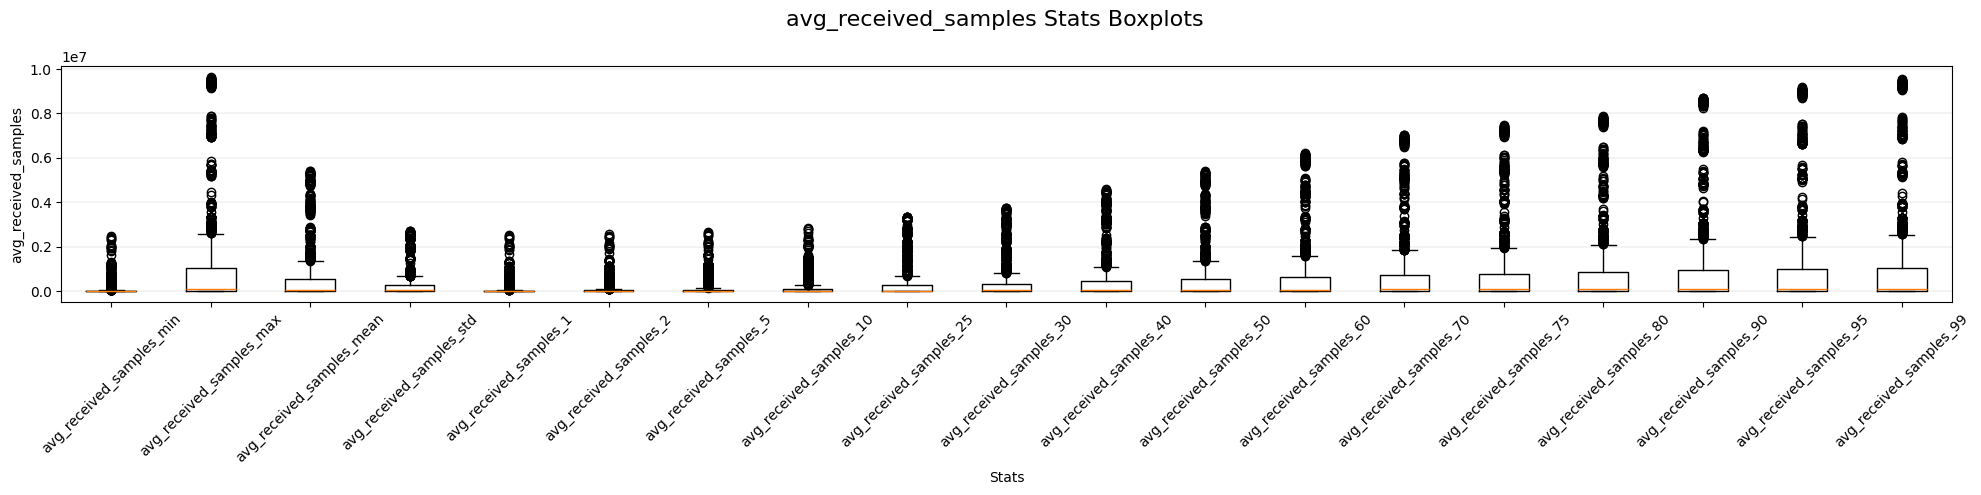

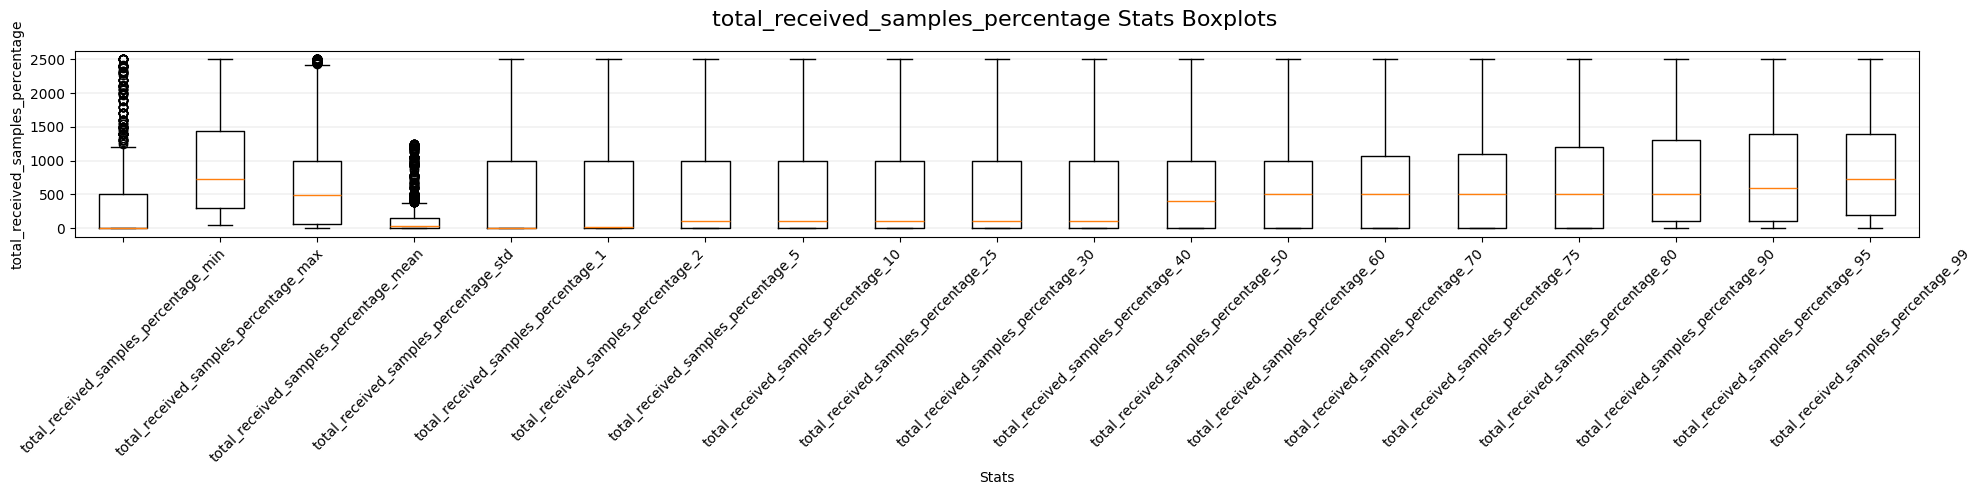

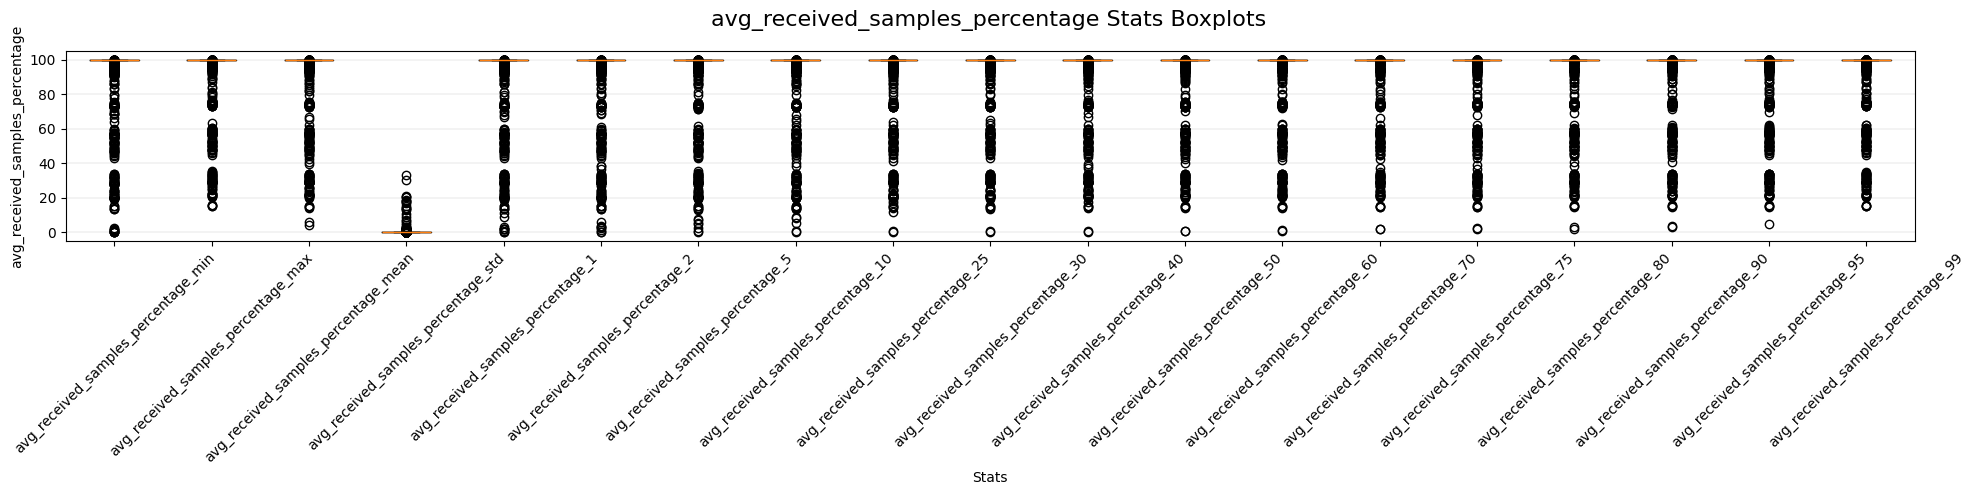

In [54]:
for METRIC in METRICS:
    metric_stat_col_names = []
    for STAT in STATS:
        metric_stat_col_names.append(f"{METRIC}_{STAT}")

    for metric_stat_col in metric_stat_col_names:
        if metric_stat_col not in full_df.columns:
            print(f"Metric stat column not found in full_df: {metric_stat_col}")

    metric_df = full_df[metric_stat_col_names]

        

    fig, axs = plt.subplots(1, 1, figsize=(20, 5))
    fig.suptitle(f"{METRIC} Stats Boxplots", fontsize=16)
    
    axs.boxplot(metric_df)
    axs.set_xticklabels(metric_df.columns)
    axs.set_xlabel("Stats")
    axs.set_ylabel(METRIC)
    axs.xaxis.set_tick_params(rotation=45)
    axs.grid(True, color='#bbb', linestyle='-', linewidth=0.25, axis='y')
    
    plt.tight_layout()
    plt.show()
        